# E-commerce Sales – Data Analysis Overview 📊

This project explores an E-commerce Sales dataset to uncover patterns in sales. The dataset includes detailed records of order details, shipping details, product details and other affecting factors.

In this project, we analyze this dataset using Python libraries such as Pandas, NumPy, and Matplotlib/Seaborn.

**Objectives**:

- Explore dataset structure
- Perform cleaning and preprocessing
- Generate insights from data
- Visualize important trends

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import skew, kurtosis
import warnings
warnings.filterwarnings("ignore")

In [2]:
file = pd.read_csv("E-commerce Sales.csv")
file.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Sales,Quantity,Shipping Cost,Order Priority
0,32298,CA-2012-124891,7/31/2012,7/31/2012,Same Day,RH-19495,Consumer,New York City,New York,United States,US,East,TEC-AC-10003033,Technology,Accessories,2309.65,7,933.57,Critical
1,26341,IN-2013-77878,02-05-2013,02-07-2013,Second Class,JR-16210,Corporate,Wollongong,New South Wales,Australia,APAC,Oceania,FUR-CH-10003950,Furniture,Chairs,3709.40,9,923.63,Critical
2,25330,IN-2013-71249,10/17/2013,10/18/2013,First Class,CR-12730,Consumer,Brisbane,Queensland,Australia,APAC,Oceania,TEC-PH-10004664,Technology,Phones,5175.17,9,915.49,Medium
3,13524,ES-2013-1579342,1/28/2013,1/30/2013,First Class,KM-16375,Home Office,Berlin,Berlin,Germany,EU,Central,TEC-PH-10004583,Technology,Phones,2892.51,5,910.16,Medium
4,47221,SG-2013-4320,11-05-2013,11-06-2013,Same Day,RH-9495,Consumer,Dakar,Dakar,Senegal,Africa,Africa,TEC-SHA-10000501,Technology,Copiers,2832.96,8,903.04,Critical


## **2. Explore the dataset**

We have to check dataset dimensions, columns, data types, and summary statistics.
- Using `file.info()` to know the
    - dimensions of the dataset,
    - column names,
    - data types of the columns,
    - count of non null values

In [3]:
file.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 51290 entries, 0 to 51289
Data columns (total 19 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Row ID          51290 non-null  int64  
 1   Order ID        51290 non-null  object 
 2   Order Date      51290 non-null  object 
 3   Ship Date       51290 non-null  object 
 4   Ship Mode       51290 non-null  object 
 5   Customer ID     51290 non-null  object 
 6   Segment         51290 non-null  object 
 7   City            51290 non-null  object 
 8   State           51290 non-null  object 
 9   Country         51290 non-null  object 
 10  Market          51290 non-null  object 
 11  Region          51290 non-null  object 
 12  Product ID      51290 non-null  object 
 13  Category        51290 non-null  object 
 14  Sub-Category    51290 non-null  object 
 15  Sales           51290 non-null  float64
 16  Quantity        51290 non-null  int64  
 17  Shipping Cost   51290 non-null 

### Observation in Exploring the Data
- The above dataset have 51290 rows with 19 availble columns.
- It has 13 categorical columns, 2 date columns and 4 numerical columns.
- All the 19 columns were non-null columns.
- All the columns datatypes are correct.

## **3. Data Cleaning**
For data cleaning purposes, we used different techniques based on our scenario which are
explained in-depth as follows:
1. Checking the Null values
2. Check for duplicates
3. Standardize the Data
4. Checking Outliers

### 1. Checking the Null Values

In [4]:
file.isnull().sum()

Row ID            0
Order ID          0
Order Date        0
Ship Date         0
Ship Mode         0
Customer ID       0
Segment           0
City              0
State             0
Country           0
Market            0
Region            0
Product ID        0
Category          0
Sub-Category      0
Sales             0
Quantity          0
Shipping Cost     0
Order Priority    0
dtype: int64

### Observation in Checking the Null Values
- Here we can confirm that there is no null values in this dataset.

### 2. Check for duplicates

In [5]:
print(file.duplicated().sum())
print(file.duplicated('Row ID').sum())

0
0


### Observation in Check for Duplicates
- By using duplicated function in pandas, we can see that there is duplicates found in this dataset.

### 3. Feature Engineering

- As we seen earlier, we have Order Date and Ship Date columns in this dataset.
- Create columns for month and day from Order Date for deeper analysis.

In [6]:
#converting into datetime dtype
file['Order Date'] = pd.to_datetime(file['Order Date'], format='mixed', dayfirst=False)
file['Ship Date'] = pd.to_datetime(file['Ship Date'], format='mixed', dayfirst=False)

In [7]:
#creating month and day column
file['Order_Month'] = file['Order Date'].dt.month_name()
month_order = ['January', 'February', 'March', 'April', 'May', 'June',
               'July', 'August', 'September', 'October', 'November', 'December']
file['Order_Month'] = pd.Categorical(file['Order_Month'], categories=month_order, ordered=True)

file['Order_Day'] = file['Order Date'].dt.day_name()
day_order = ['Sunday', 'Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday',
               'Saturday']
file['Order_Day'] = pd.Categorical(file['Order_Day'], categories=day_order, ordered=True)

file['Order_Year'] = file['Order Date'].dt.year

file.head()

,Row ID,Order ID,Order Date,Ship Date,Ship Mode,Customer ID,Segment,City,State,Country,...,Product ID,Category,Sub-Category,Sales,Quantity,Shipping Cost,Order Priority,Order_Month,Order_Day,Order_Year
0,32298,CA-2012-124891,2012-07-31,2012-07-31,Same Day,RH-19495,Consumer,New York City,New York,United States,...,TEC-AC-10003033,Technology,Accessories,2309.65,7,933.57,Critical,July,Tuesday,2012
1,26341,IN-2013-77878,2013-02-05,2013-02-07,Second Class,JR-16210,Corporate,Wollongong,New South Wales,Australia,...,FUR-CH-10003950,Furniture,Chairs,3709.40,9,923.63,Critical,February,Tuesday,2013
2,25330,IN-2013-71249,2013-10-17,2013-10-18,First Class,CR-12730,Consumer,Brisbane,Queensland,Australia,...,TEC-PH-10004664,Technology,Phones,5175.17,9,915.49,Medium,October,Thursday,2013
3,13524,ES-2013-1579342,2013-01-28,2013-01-30,First Class,KM-16375,Home Office,Berlin,Berlin,Germany,...,TEC-PH-10004583,Technology,Phones,2892.51,5,910.16,Medium,January,Monday,2013
4,47221,SG-2013-4320,2013-11-05,2013-11-06,Same Day,RH-9495,Consumer,Dakar,Dakar,Senegal,...,TEC-SHA-10000501,Technology,Copiers,2832.96,8,903.04,Critical,November,Tuesday,2013


### 4. Checking Outlier 

- Using describe function, we can get some statistical distribution of the data of each numerical column.

In [8]:
file.describe()

,Row ID,Order Date,Ship Date,Sales,Quantity,Shipping Cost,Order_Year
count,51290.00000,51290,51290,51290.000000,51290.000000,51290.000000,51290.000000
mean,25645.50000,2013-05-11 21:26:49.155781120,2013-05-15 20:42:42.745174528,246.490685,3.476545,26.375915,2012.777208
min,1.00000,2011-01-01 00:00:00,2011-01-03 00:00:00,0.440000,1.000000,0.000000,2011.000000
25%,12823.25000,2012-06-19 00:00:00,2012-06-23 00:00:00,30.762500,2.000000,2.610000,2012.000000
50%,25645.50000,2013-07-08 00:00:00,2013-07-12 00:00:00,85.055000,3.000000,7.790000,2013.000000
75%,38467.75000,2014-05-22 00:00:00,2014-05-26 00:00:00,251.055000,5.000000,24.450000,2014.000000
max,51290.00000,2014-12-31 00:00:00,2015-01-07 00:00:00,22638.480000,14.000000,933.570000,2014.000000
std,14806.29199,NaN,NaN,487.565388,2.278766,57.296804,1.098931


- When seeing the statistical measures, we can see irrelevant range of distribution in sales and shipping cost columns.
- Difference between the Min value & 25th qantile and Max & 75th quantile is varied so much.

In [9]:
#checking outliers through graph
def outlier_graph(cols):
    
    for i in range(1,len(cols)+1):
        col = cols[i-1]
        sk = skew(file[col])
        ku = kurtosis(file[col])
        
        plt.figure(figsize=(12,6))
        plt.suptitle(f'{col}')
        
        plt.subplot(1,2,1)
        plt.title(f'Boxplot of {col}')
        sns.boxplot(file[col], orient='h')

        plt.subplot(1,2,2)
        plt.title(f"Symmetric Distribution {col}\nSkewness={sk:.2f}, Kurtosis={ku:.2f}")
        sns.histplot(file[col], kde=True)
        plt.tight_layout()
        plt.show()

#By using the User Defined Function below, we can find and drop the outliers easily
outlier_df_dict = {}

def outlier_handle(i):
    global outlier_df_dict

    #finding the first quartile
    Q1 = file[i].quantile(0.25) 
    #finding the thirt quartile
    Q3 = file[i].quantile(0.75) 
    print(f"Q1 = {Q1} ,Q3 = {Q3}")

    #finding inter quartile range(IQR)
    IQR = Q3 - Q1 
    print("IQR = ",IQR)

    #finding the lower bound
    LB = Q1 - (1.5 * IQR) 
    #finding the lower bound
    UB = Q3 + (1.5 * IQR) 
    print(f"LB = {LB} ,UB = {UB}")

    #checking for outliers in df
    outliers_df = file[(file[i] < LB) | (file[i] > UB)] 

    

    #getting teh index for outliers
    outliers_index = outliers_df.index 

    print(f"""
    No. of. Outliers: {len(outliers_index)}
    Availabe no. of. records: {len(file.index)}
    After removing, Availabe no. of. records: {(len(file[i].index) - len(outliers_index))}
    """)

    #asking to remove outlier
    YorN = input("Continue to Remove Outliers?(Y/N): ")
    if YorN.upper() == 'Y':
        #saving the outlier df in a dictionary
        outlier_df_dict[f"df_{i}"] = outliers_df 
        
        #removing teh outliers
        file.drop(outliers_index, inplace=True)

        print(f"""
        No. of. Outliers Removed: {len(outliers_index)}
        Availabe no. of. records: {len(file.index)}
        Removed Outliers stored in: outlier_df_dict["df_{i}"]
        """) 

        
        plt.title(f'{i}')
        sns.boxplot(file[i],orient='h')
        plt.tight_layout()    
        plt.show()
            
    elif YorN.upper() == 'N':
        print("No outliers removed")
        print(f"""
        Availabe no. of. records: {len(file.index)}
        """)
    else:
        print("Invalid input")
    
    

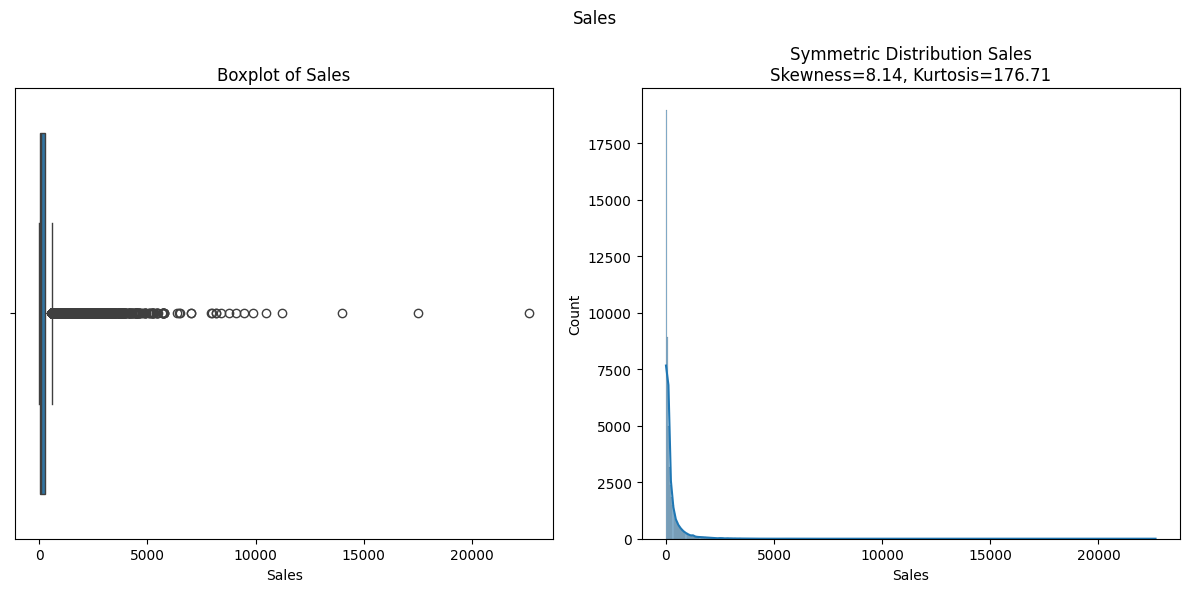

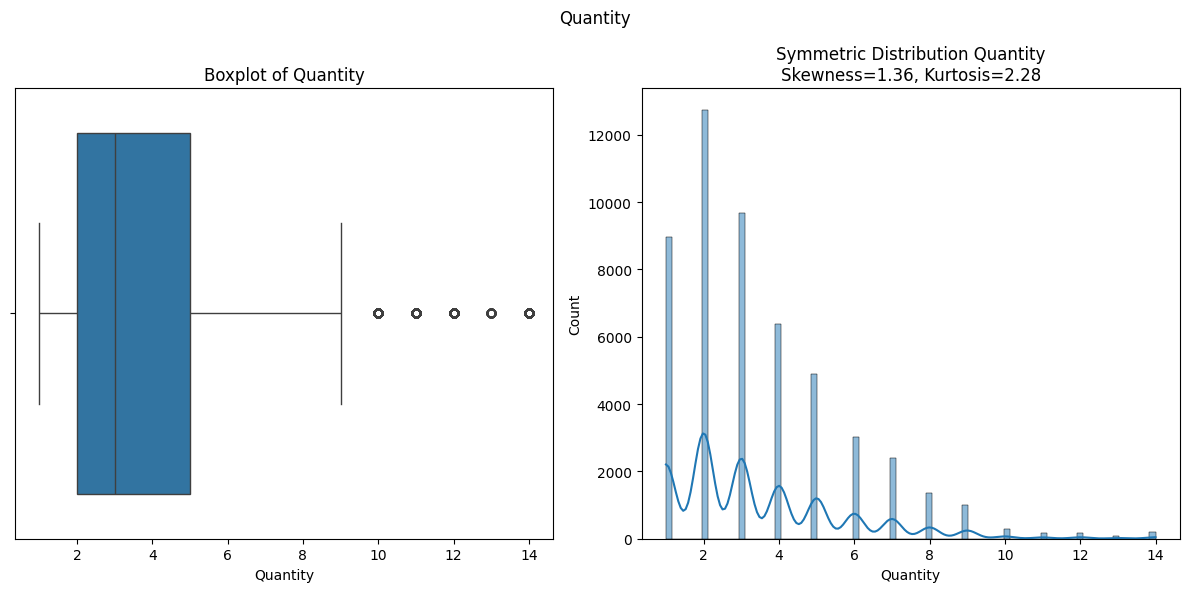

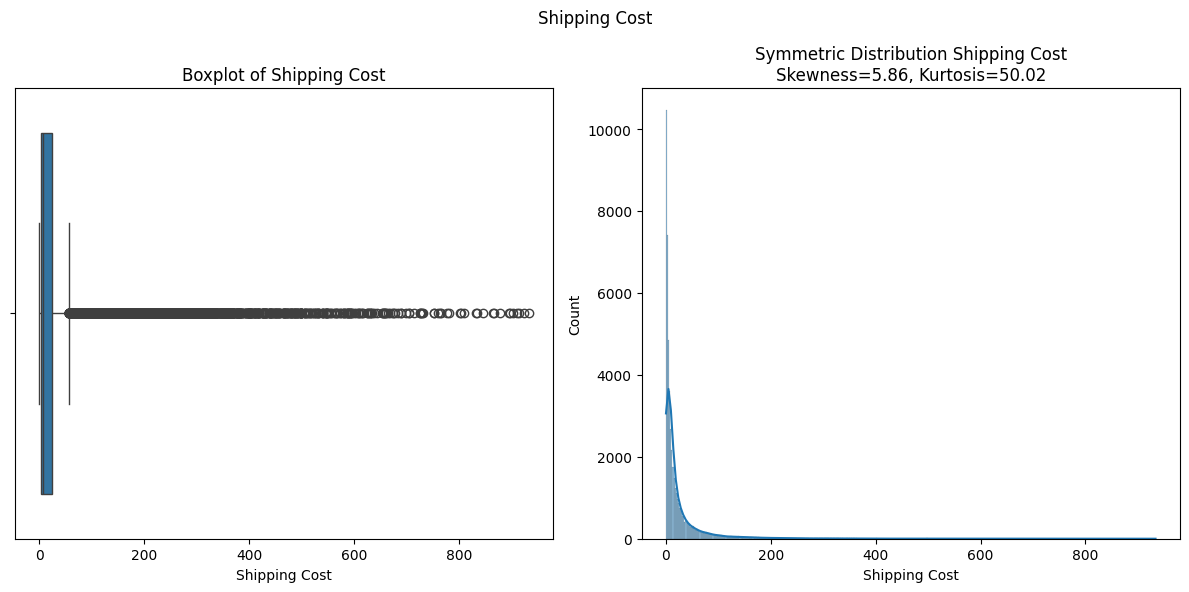

In [10]:
outlier_graph(['Sales','Quantity','Shipping Cost'])

- Here we can see that there is a huge amount of outliers.
- Comparitively Sales column has the most outliers, so lets drop the outliers on the Sales column.

Q1 = 30.762500000000003 ,Q3 = 251.055
IQR =  220.29250000000002
LB = -299.67625000000004 ,UB = 581.4937500000001

    No. of. Outliers: 5655
    Availabe no. of. records: 51290
    After removing, Availabe no. of. records: 45635
    


Continue to Remove Outliers?(Y/N):  y



        No. of. Outliers Removed: 5655
        Availabe no. of. records: 45635
        Removed Outliers stored in: outlier_df_dict["df_Sales"]
        


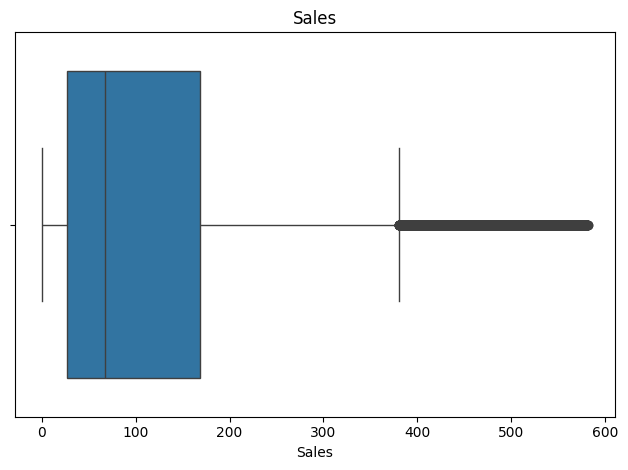

In [11]:
outlier_handle("Sales")

- Removed outliers in the basis of Sales column, lets check the outliers in other columns.

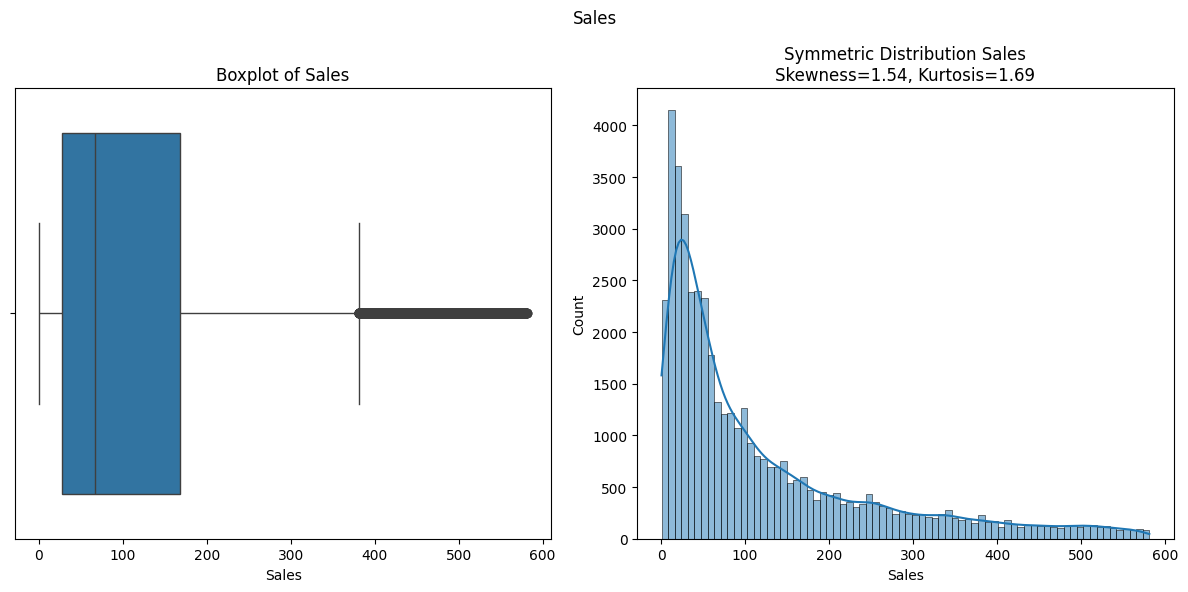

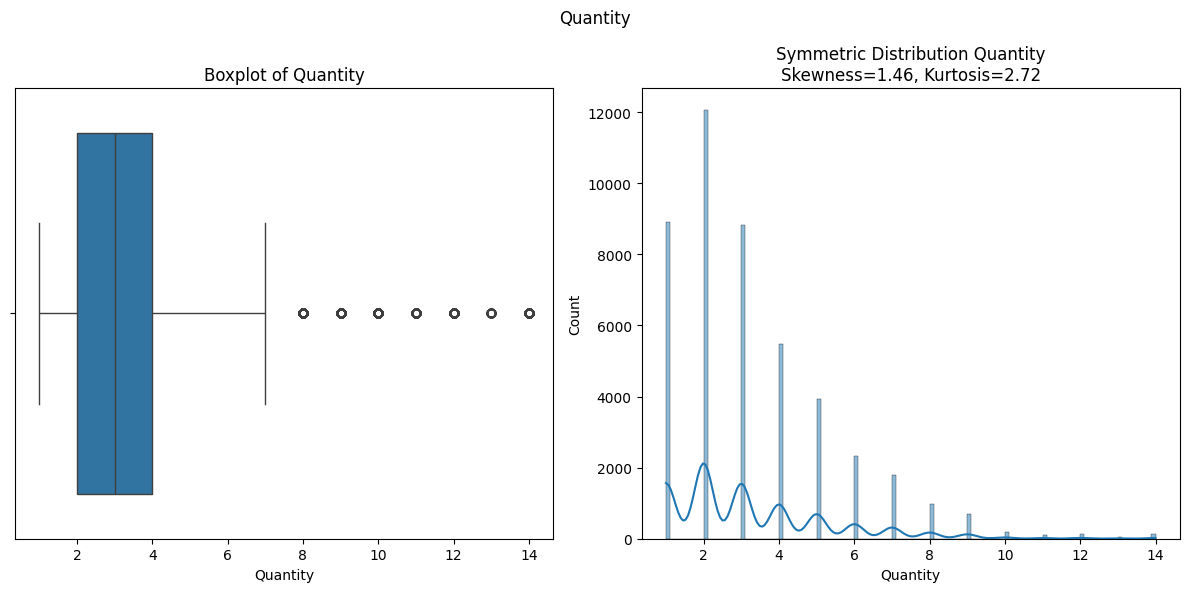

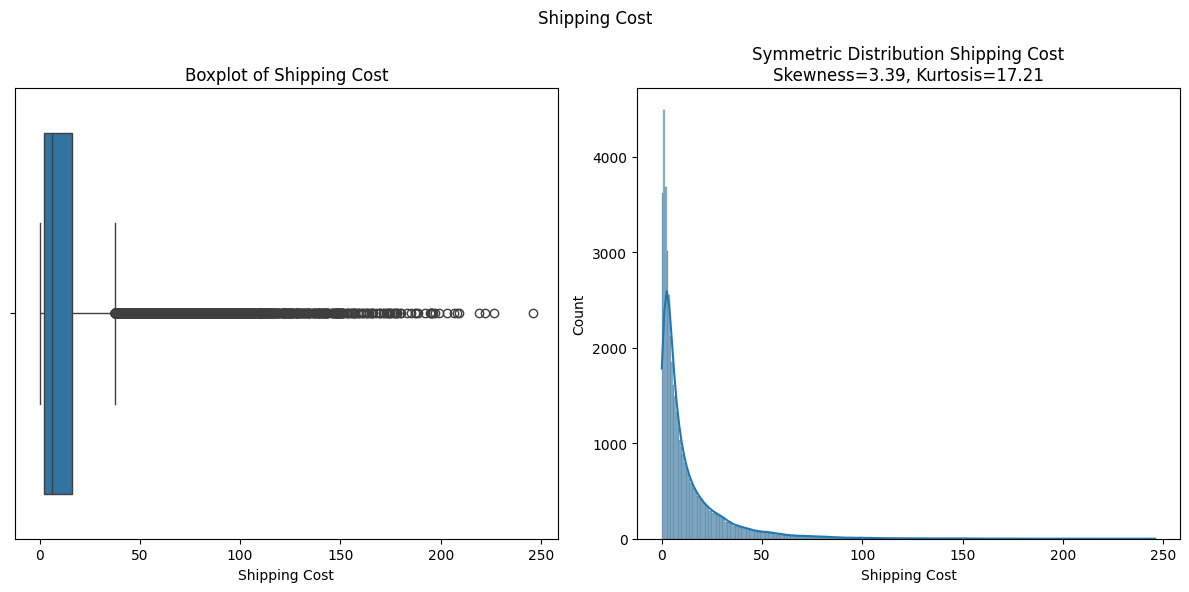

In [12]:
outlier_graph(['Sales','Quantity','Shipping Cost'])

- Still we can see the outliers in Shipping cost column which will affect the quality of the analysis.

Q1 = 2.28 ,Q3 = 16.41
IQR =  14.13
LB = -18.915 ,UB = 37.605000000000004

    No. of. Outliers: 3827
    Availabe no. of. records: 45635
    After removing, Availabe no. of. records: 41808
    


Continue to Remove Outliers?(Y/N):  y



        No. of. Outliers Removed: 3827
        Availabe no. of. records: 41808
        Removed Outliers stored in: outlier_df_dict["df_Shipping Cost"]
        


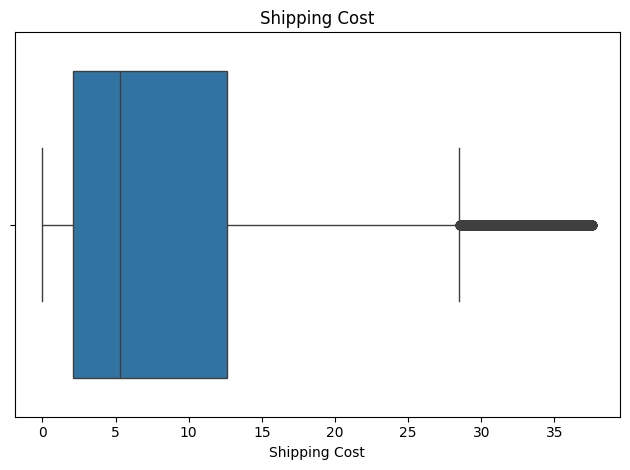

In [13]:
outlier_handle("Shipping Cost")

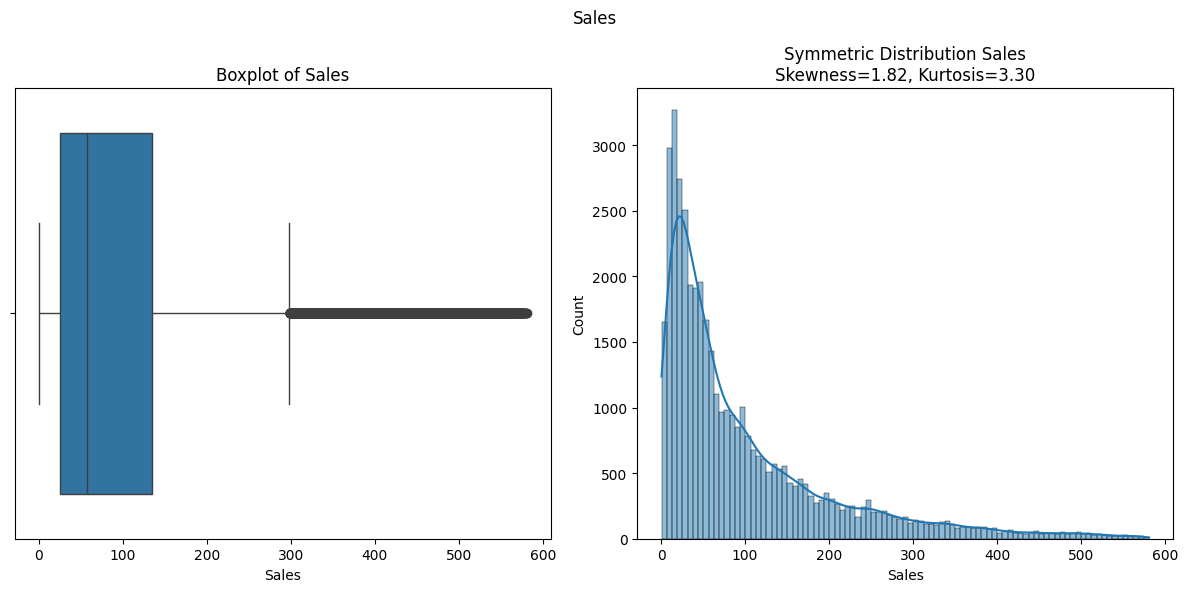

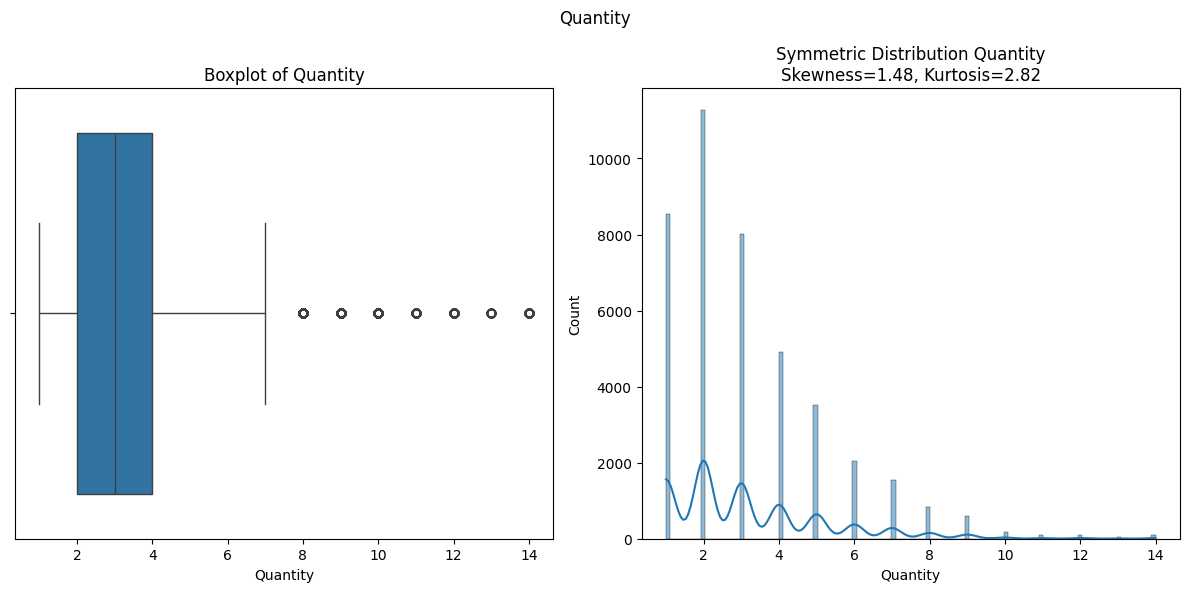

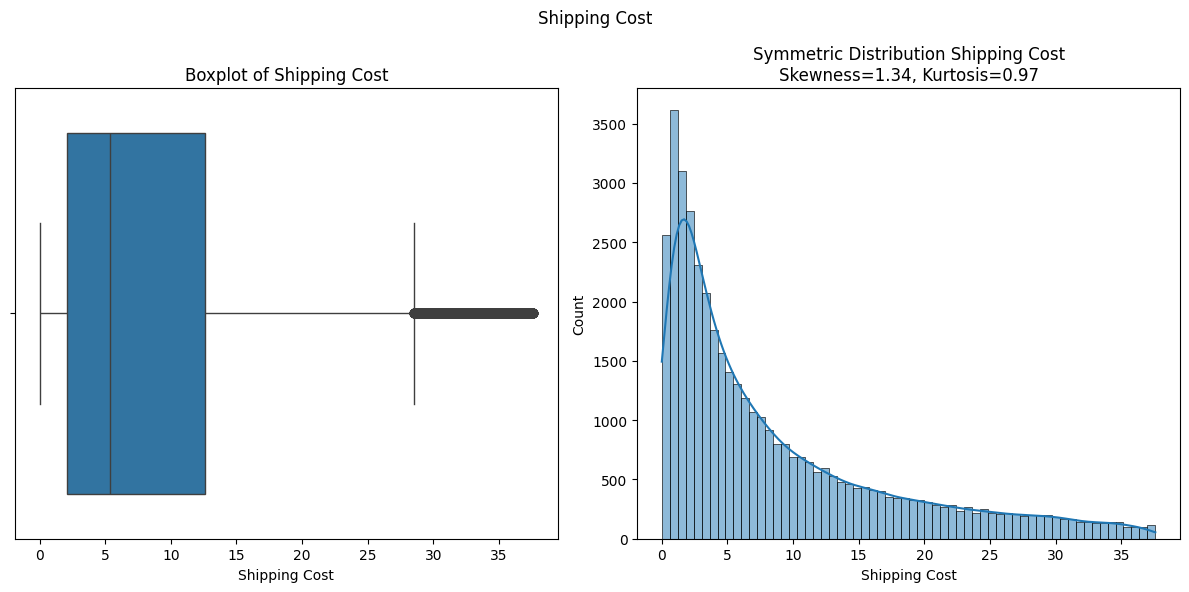

In [14]:
outlier_graph(['Sales','Quantity','Shipping Cost'])

### Observation in Data Cleaning
- There is no duplicates and null values in this dataset.
- Converted date column data type from object to datetime for better analysis.
- Additionally, 2(Order_Month, Order_Day) columns were created from Order date columns.
- Using describe function and statistics, we found wide range of outliers, so we removed from original dataset and stored in another dictionery.

## **3. Exploratory Data Analysis**
1. Summary Statistics
2. Analysis Visualizations
3. Providing Insights

### 1. Statistical Description

In [15]:
file[['Sales','Quantity','Shipping Cost']].describe()

,Sales,Quantity,Shipping Cost
count,41808.000000,41808.000000,41808.000000
mean,98.750540,3.188839,8.735613
std,105.961474,2.110392,8.843581
min,0.440000,1.000000,0.000000
25%,25.057500,2.000000,2.060000
50%,57.900000,3.000000,5.340000
75%,134.385000,4.000000,12.640000
max,581.040000,14.000000,37.600000


- After handling the outlier, we can see a good distribution of data compared to before handling the outlier.

In [16]:
file.describe(include='object')

,Order ID,Ship Mode,Customer ID,Segment,City,State,Country,Market,Region,Product ID,Category,Sub-Category,Order Priority
count,41808,41808,41808,41808,41808,41808,41808,41808,41808,41808,41808,41808,41808
unique,22484,4,1589,3,3503,1076,147,7,13,9303,3,17,4
top,NI-2014-8880,Standard Class,BE-11335,Consumer,New York City,California,United States,LATAM,Central,OFF-AR-10003651,Office Supplies,Binders,Medium
freq,13,26119,76,21647,746,1661,8358,8575,8976,35,29066,5978,25291


### 2. Analysis 

## 📦 Product Category Analysis
Features used: `Category`, `Sub-Category`, `Sales`, `Quantity`, `Profit`

1. Which product category generates the highest total profit?
2. Which sub-category contributes most to overall profit?
3. Which sub-category has the highest total quantity sold?
4. What is the average quantity purchased per sub-category?
5. Is there any sub-category with high sales but low profit?



In [17]:
#1. Which product category generates the highest total profit?
profit_cat = file.groupby(['Category'])['Sales'].sum().sort_values()
profit_cat

Category
Furniture          1017719.42
Technology         1118453.37
Office Supplies    1992389.80
Name: Sales, dtype: float64

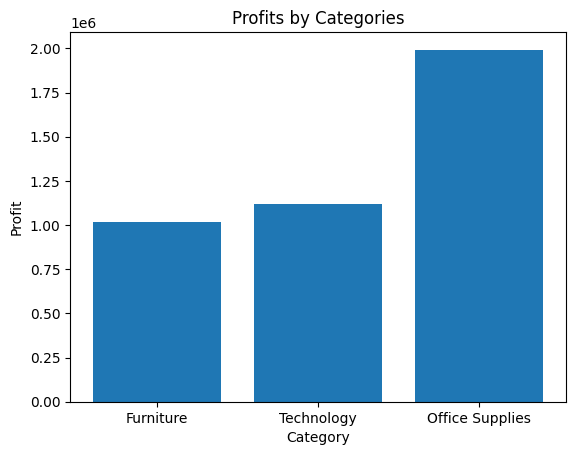

In [18]:
plt.bar(profit_cat.index,profit_cat.values)
plt.title("Profits by Categories")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.show()

- This dataset have 3 Category of products.
- Among these, Office supply products are the top sales made products with sales of 19,92,389.80
- Other categories like Technology and Furniture category products have generated a revenue above 10,00,000 each.
- The total sales amount is 41,28,562.59

In [19]:
#2. Which sub-category contributes most to overall profit?
sub_cat_profit = file.groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
sub_cat_profit

Sub-Category
Storage        492509.26
Chairs         400110.19
Phones         384896.05
Art            326355.36
Accessories    326100.03
Binders        290746.89
Furnishings    275237.79
Bookcases      270191.10
Copiers        234342.78
Paper          219867.01
Supplies       188997.54
Machines       173114.51
Appliances     162740.87
Envelopes      157901.20
Fasteners       82682.67
Tables          72180.34
Labels          70589.00
Name: Sales, dtype: float64

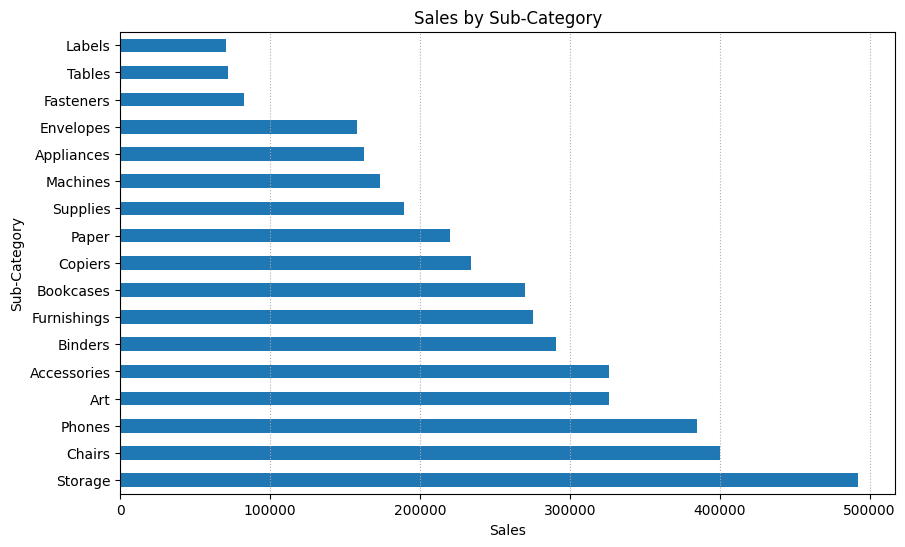

In [20]:
plt.figure(figsize=(10,6))
sub_cat_profit.plot(kind='barh',title='Sales by Sub-Category',xlabel='Sales',ylabel='Sub-Category')
plt.grid(axis='x',linestyle=':')
plt.show()

- Storage products contributes most to the overall profit(492509.26).
- Other top sales sub categories are chairs, phones, art, accessories with sales above 300000.
- Labels, tables, fasteners, were the least sold sub category products with sales below 100000.
- Other products were achieved a sales in the range between 150000 to 300000.

In [21]:
#3. Which sub-category has the highest total quantity sold?
quan_sub_cat = file.groupby("Sub-Category")['Quantity'].sum().sort_values(ascending=False).head(8)
quan_sub_cat

Sub-Category
Binders        20431
Art            15225
Paper          12227
Storage        12071
Furnishings     9776
Labels          9261
Fasteners       8352
Supplies        8071
Name: Quantity, dtype: int64

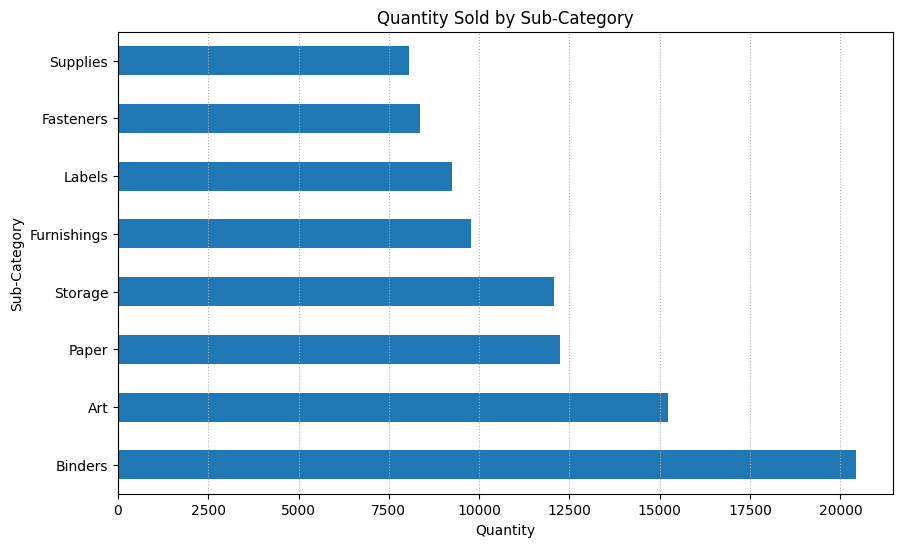

In [22]:
plt.figure(figsize=(10,6))
quan_sub_cat.plot(kind='barh',title='Quantity Sold by Sub-Category',xlabel='Quantity',ylabel='Sub-Category')
plt.grid(axis='x',linestyle=':')
plt.show()

- Binders are thetop sub category products with highest sales quantity of 20431.
- Other top sales sub category were Art, Paper, Storage products with sales quantity above 10000.
- Supplies and Fasteners were standing in last with low sales quantity.

In [23]:
#4. What is the average quantity purchased per sub-category?
avg_quan_sub_cat = file.groupby("Sub-Category")['Quantity'].mean().round(2).sort_values(ascending=False)
avg_quan_sub_cat

Sub-Category
Labels         3.56
Paper          3.54
Fasteners      3.46
Supplies       3.43
Binders        3.42
Envelopes      3.37
Furnishings    3.33
Art            3.22
Accessories    3.12
Storage        2.95
Appliances     2.95
Chairs         2.88
Phones         2.80
Machines       2.42
Bookcases      2.34
Tables         2.29
Copiers        2.06
Name: Quantity, dtype: float64

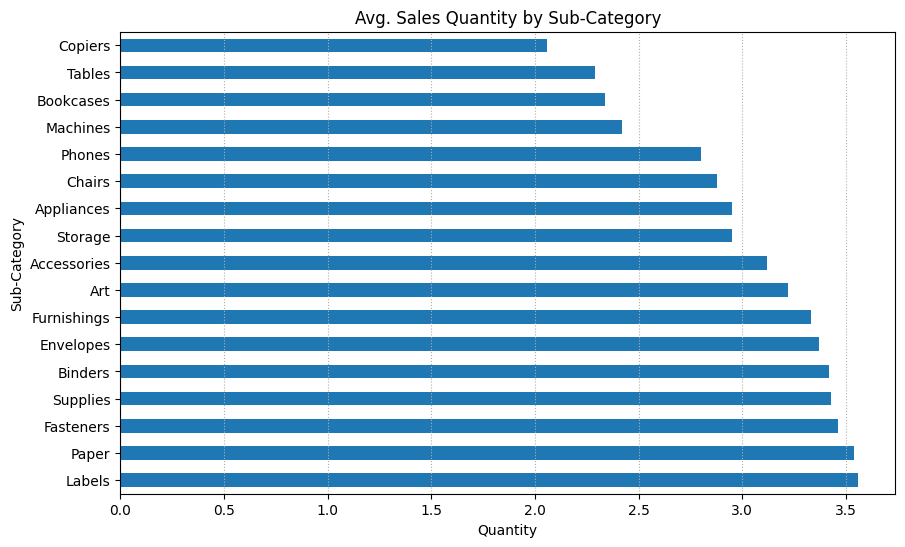

In [24]:
plt.figure(figsize=(10,6))
avg_quan_sub_cat.plot(kind='barh',title='Avg. Sales Quantity by Sub-Category',xlabel='Quantity',ylabel='Sub-Category')
plt.grid(axis='x',linestyle=':')
plt.show()

- Here we can clearly see that all the category products have an average purchase quantity above 2.
- Labels and Paper were the top categories with high avg quantity(above 3).
- Copiers and tables were the least categories with low avg sales quantity(2.5)
- The most sold products by sales like storage, phone, chair, art and accessories products were sold with 2.8 to 3.2 of avg. quantity.

In [25]:
#5. What are the top sold sub-category products for each Main Category?

sub_cat = file.groupby(['Category', 'Sub-Category'])['Sales'].sum().reset_index(name='Sum_Sales')

sub_cat_sorted = sub_cat.sort_values(['Category', 'Sum_Sales'], ascending=[True, False])

top_sold = sub_cat_sorted.groupby('Category').nth((0,1))

top_sold

,Category,Sub-Category,Sum_Sales
1,Furniture,Chairs,400110.19
2,Furniture,Furnishings,275237.79
11,Office Supplies,Storage,492509.26
5,Office Supplies,Art,326355.36
16,Technology,Phones,384896.05
13,Technology,Accessories,326100.03


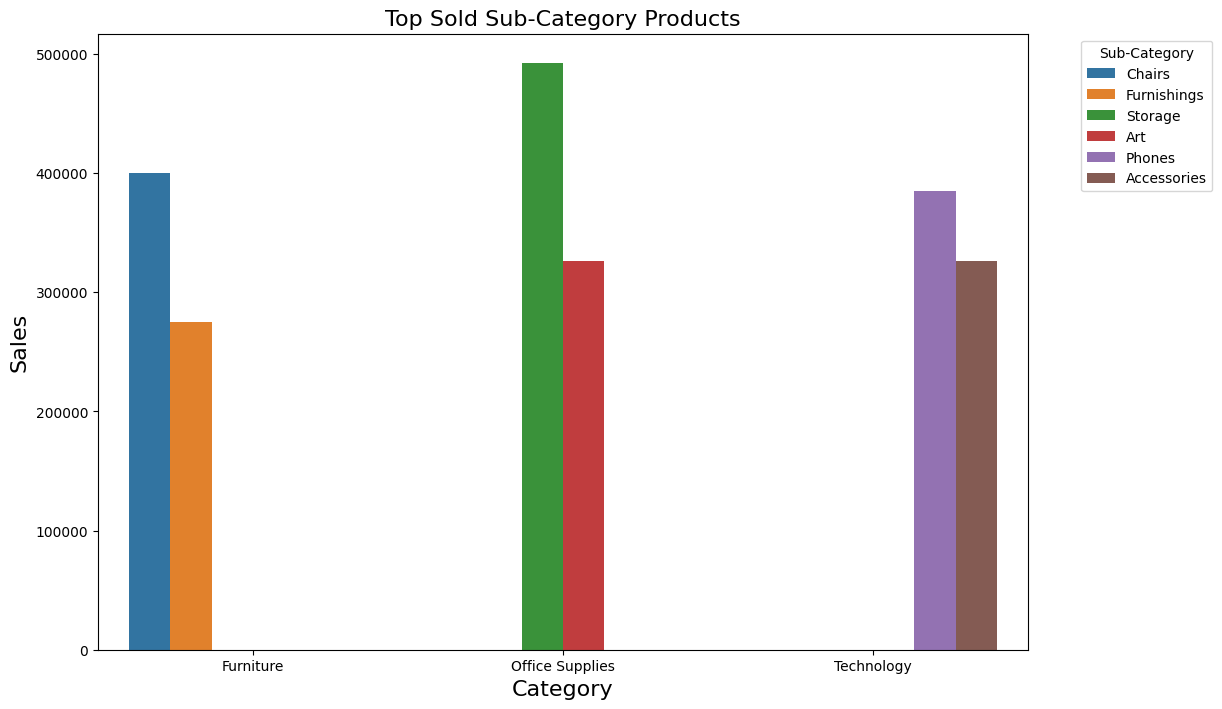

In [26]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Category', y='Sum_Sales', hue='Sub-Category', data=top_sold)
plt.title('Top Sold Sub-Category Products',fontsize = 16)
plt.xlabel('Category',fontsize = 16)
plt.ylabel('Sales',fontsize = 16)
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

- Here we can see the top 2 sold sub category products on each main category.
- In furniture category, Chairs and Furnishings were the top sales sub category products.
- In office supplies category, Storage and Arts were the top sales sub category products.
- In furniture category, Phones and Accessories were the top sales sub category products.

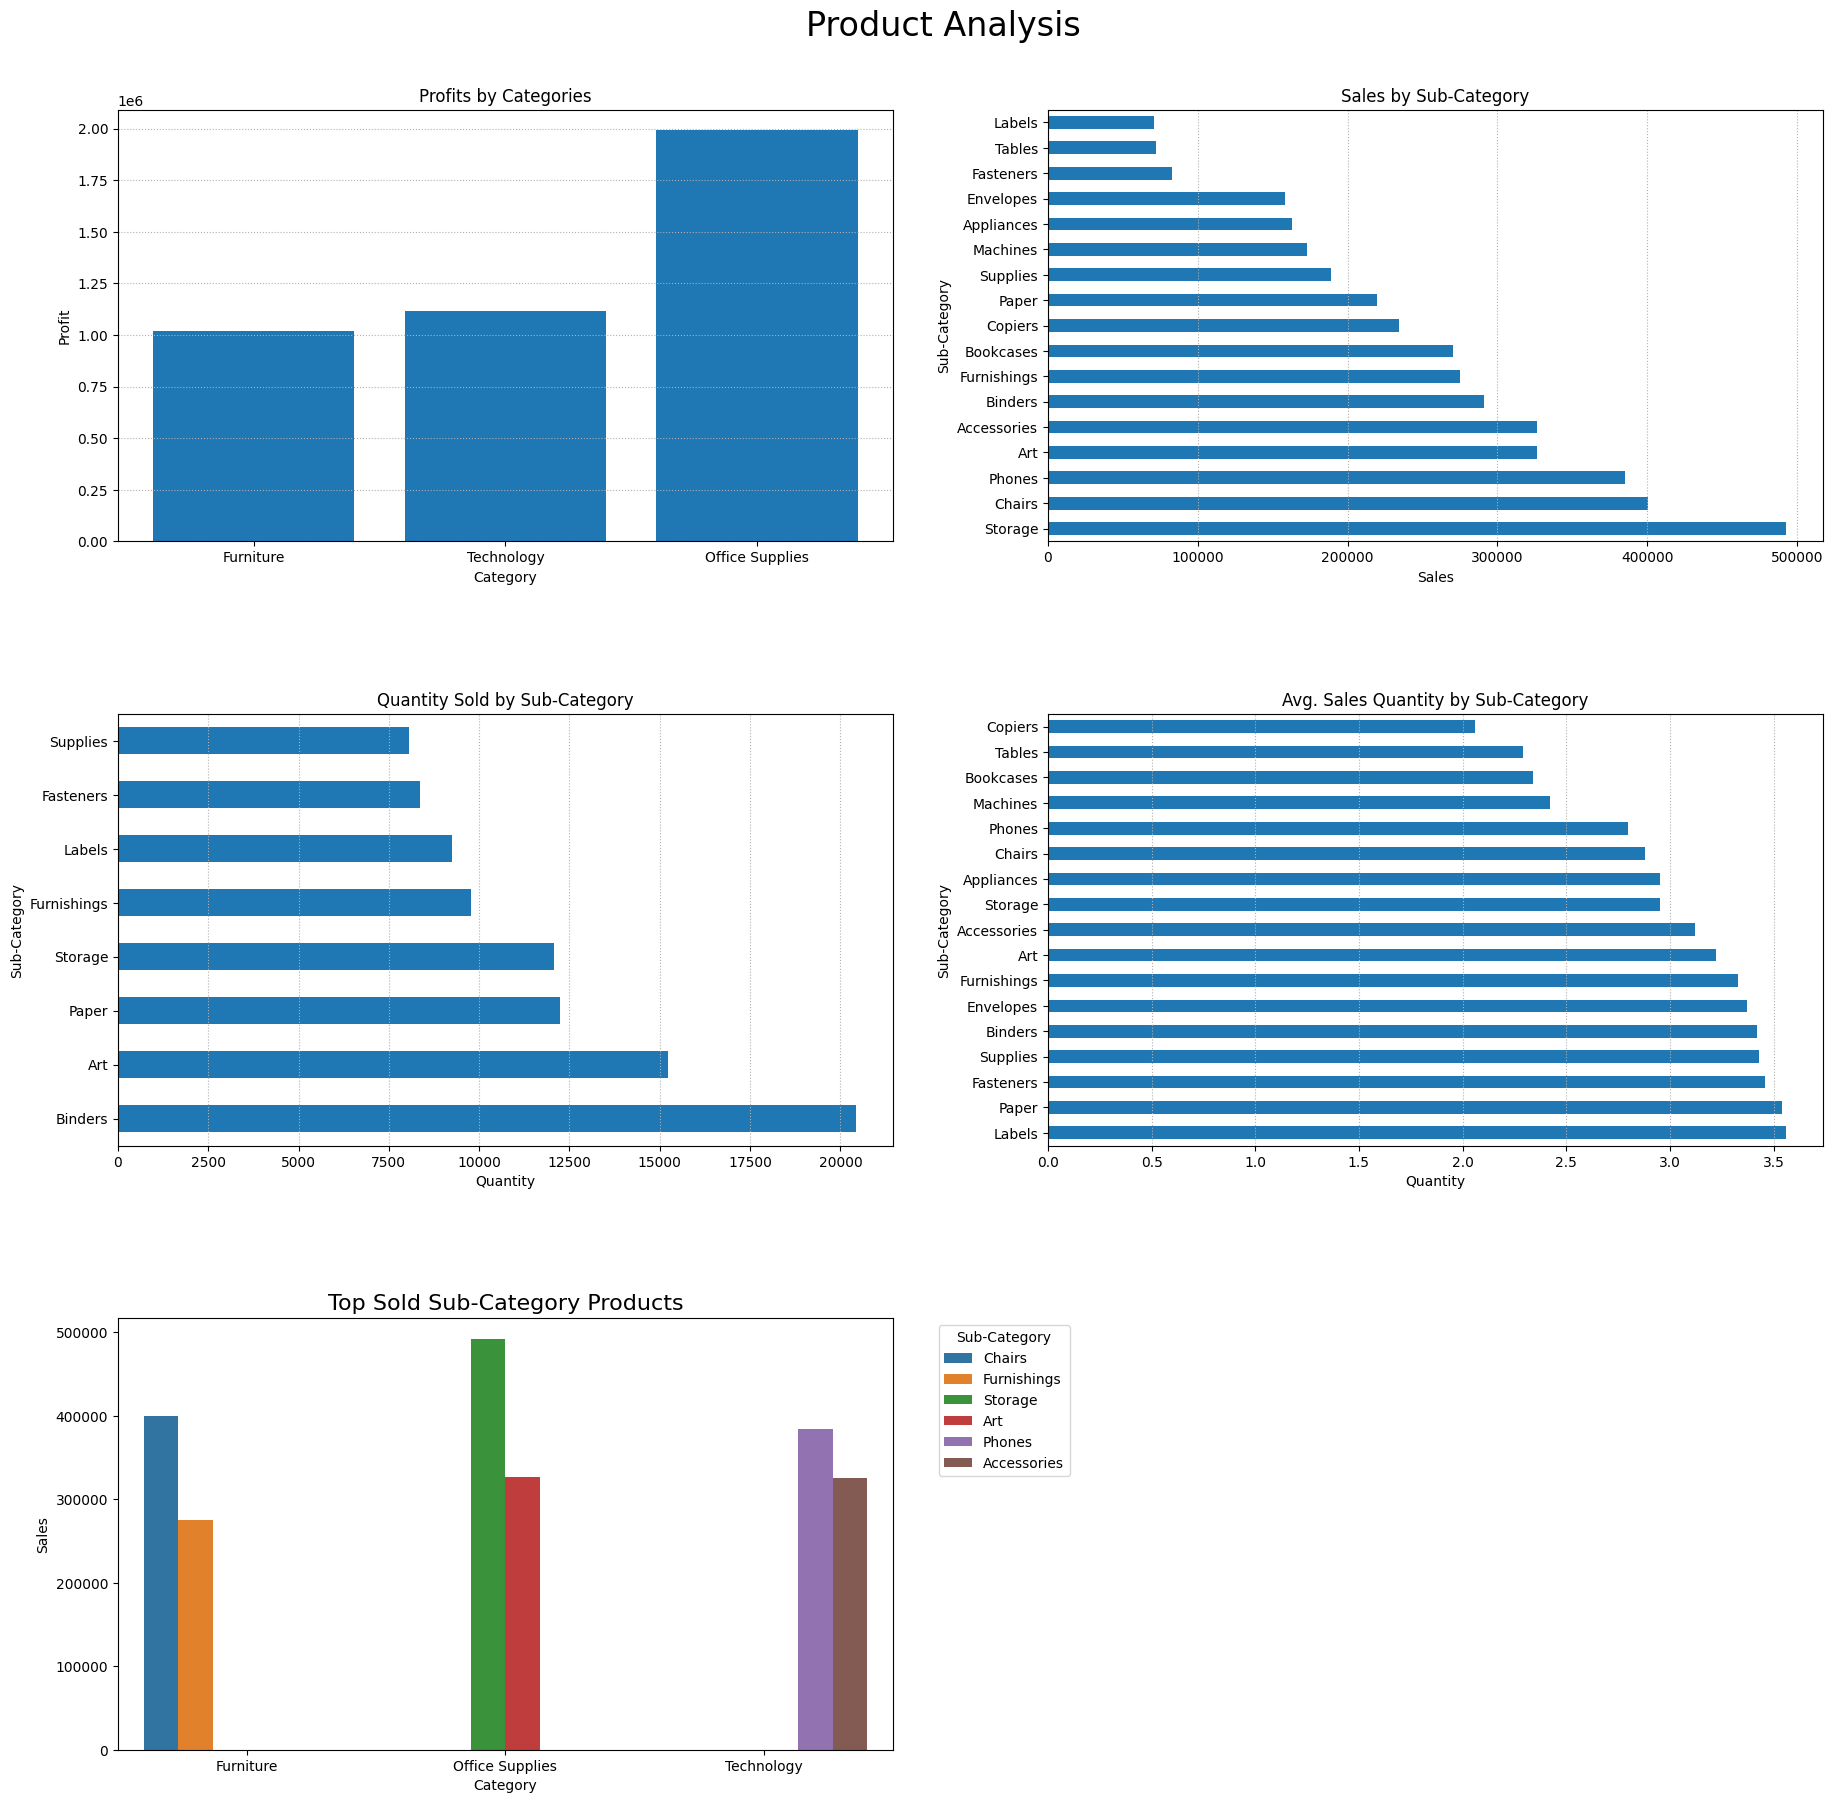

In [82]:
plt.figure(figsize=(22,20))
plt.suptitle("Product Analysis",fontsize = 24) 
plt.tight_layout() 



plt.subplot(3,2,1)

plt.bar(profit_cat.index,profit_cat.values)
plt.title("Profits by Categories")
plt.xlabel("Category")
plt.ylabel("Profit")
plt.grid(axis='y',linestyle=':')



plt.subplot(3,2,2)

sub_cat_profit.plot(kind='barh',title='Sales by Sub-Category',xlabel='Sales',ylabel='Sub-Category')
plt.grid(axis='x',linestyle=':')



plt.subplot(3,2,3)

quan_sub_cat.plot(kind='barh',title='Quantity Sold by Sub-Category',xlabel='Quantity',ylabel='Sub-Category')
plt.grid(axis='x',linestyle=':')



plt.subplot(3,2,4)

avg_quan_sub_cat.plot(kind='barh',title='Avg. Sales Quantity by Sub-Category',xlabel='Quantity',ylabel='Sub-Category')
plt.grid(axis='x',linestyle=':')



plt.subplot(3,2,5)

sns.barplot(x='Category', y='Sum_Sales', hue='Sub-Category', data=top_sold)
plt.title('Top Sold Sub-Category Products',fontsize = 16)
plt.xlabel('Category')
plt.ylabel('Sales')
plt.legend(title='Sub-Category', bbox_to_anchor=(1.05, 1), loc=2)


    



plt.subplots_adjust(hspace=0.4,top=0.93)
plt.show()

## 💰 Monetary Analysis
Features used: `Sales`, `Profit`, `Discount`, `Sub-Category`, `Order_Month`

1. Which months stands top and low in total sales?
2. Which category sold most and least in top sales month?
3. What is the total sales amount by each sub-category?
4. Which sub-categories have high discounts but low profit?
5. Which sub-categories have high sales but low quantity sold?

In [27]:
#1. Which months show top and low in total sales?
month_sales = file.groupby('Order_Month')['Sales'].sum().sort_values(ascending=False)

print(f"""
Top sales month :
{month_sales.head(1)}

Low sales month :
{month_sales.tail(1)}
""")


Top sales month :
Order_Month
December    508172.66
Name: Sales, dtype: float64

Low sales month :
Order_Month
February    181454.58
Name: Sales, dtype: float64



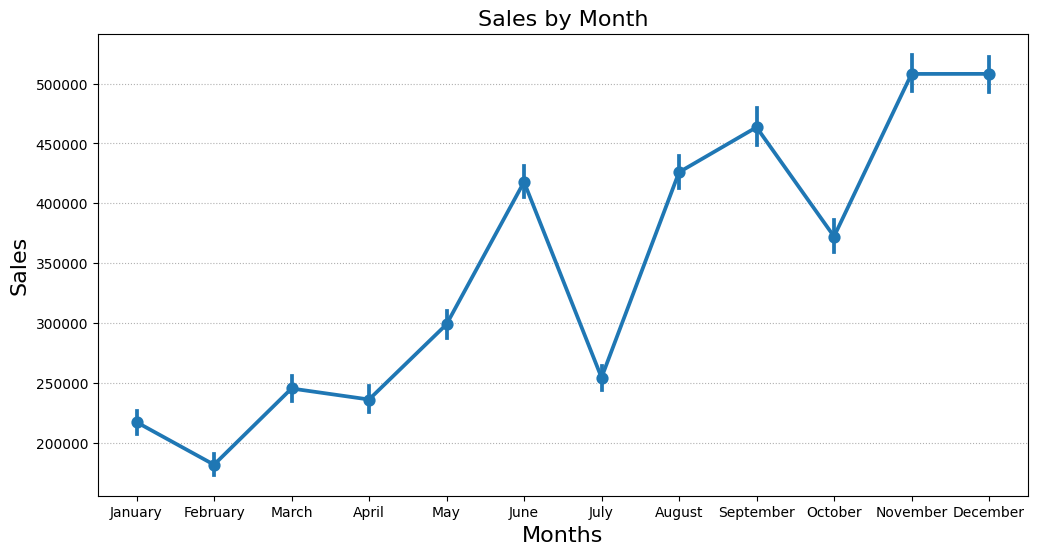

In [28]:
plt.figure(figsize=(12, 6))
sns.pointplot(x='Order_Month', y='Sales',  data=file,estimator='sum')
plt.title('Sales by Month',fontsize = 16)
plt.xlabel('Months',fontsize = 16)
plt.ylabel('Sales',fontsize = 16)
plt.grid(axis='y',linestyle=':')
plt.show()

- Top sales month : December    Sales : 508172.66
- Low sales month : February    Sales : 181454.58

In [29]:
#2. Which category sold most and least in top sales month?
top_cat = file[file['Order_Month'] == 'December'].groupby('Sub-Category')['Sales'].sum().sort_values(ascending=False)
print(f"""
High Sales Sub-Category in Top sales month :
{top_cat.head(1)}

Low Sales Sub-Category in Top sales month :
{top_cat.tail(1)}
""")


High Sales Sub-Category in Top sales month :
Sub-Category
Storage    58873.91
Name: Sales, dtype: float64

Low Sales Sub-Category in Top sales month :
Sub-Category
Labels    7976.38
Name: Sales, dtype: float64



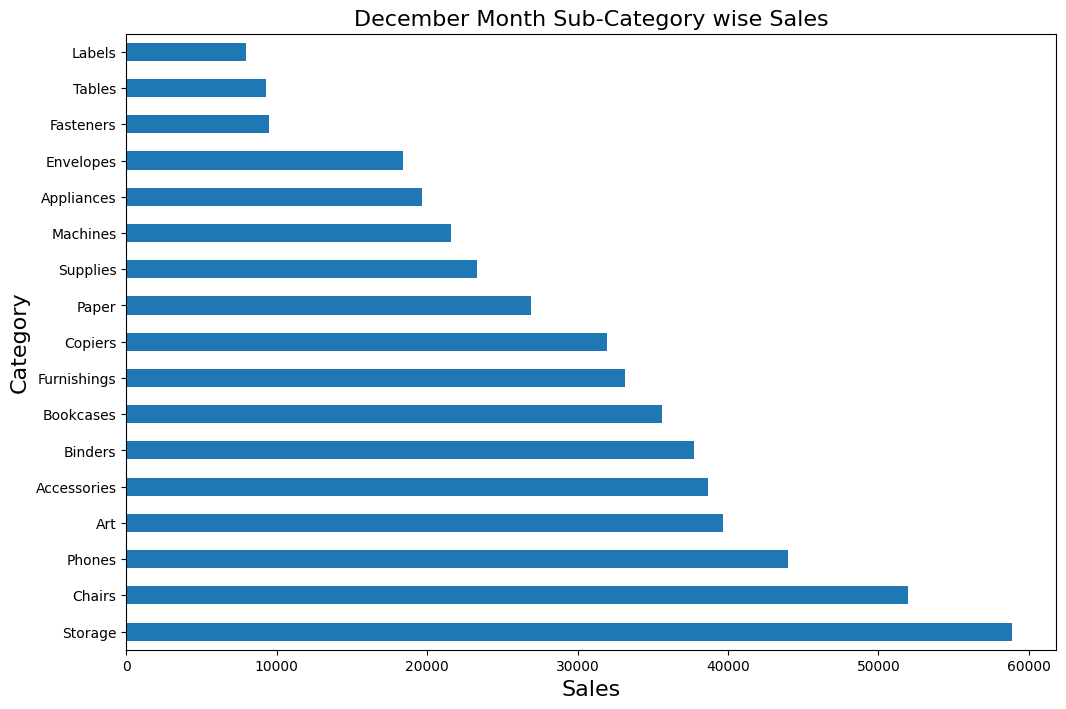

In [30]:
plt.figure(figsize=(12, 8))
top_cat.plot(kind='barh')
plt.title('December Month Sub-Category wise Sales',fontsize = 16)
plt.ylabel('Category',fontsize = 16)
plt.xlabel('Sales',fontsize = 16)
plt.show()

- High Sales Sub-Category in Top sales month :
    - Sub-Category Storage    58873.91


- Low Sales Sub-Category in Top sales month :
    - Sub-Category Labels    7976.38

In [31]:
#3. What is the total sales amount by each sub-category in most sold category?
# We already know that 'Office Supplies' is the top category
t_sales_sub_cat = file[file['Category'] == 'Office Supplies'].groupby('Sub-Category')['Sales'].sum().sort_values()
t_sales_sub_cat

Sub-Category
Labels         70589.00
Fasteners      82682.67
Envelopes     157901.20
Appliances    162740.87
Supplies      188997.54
Paper         219867.01
Binders       290746.89
Art           326355.36
Storage       492509.26
Name: Sales, dtype: float64

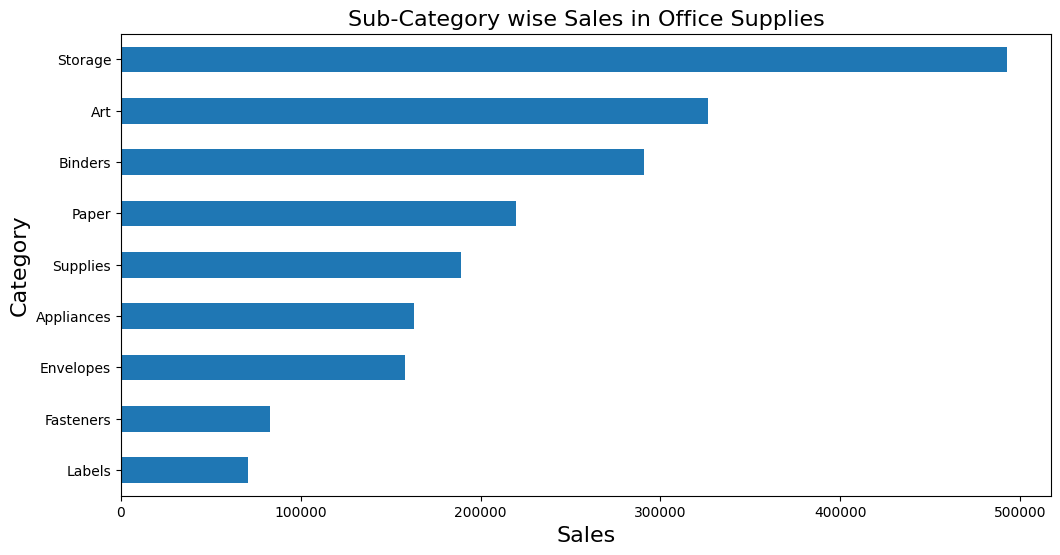

In [56]:
plt.figure(figsize=(12, 6))
t_sales_sub_cat.plot(kind='barh')
plt.title('Sub-Category wise Sales in Office Supplies',fontsize = 16)
plt.ylabel('Category',fontsize = 16)
plt.xlabel('Sales',fontsize = 16)
plt.show()

- Storage products were the high sales products in December Month.
- Art products were the 2nd high sales products in December Month followed by Binders.
- Labels and Fasteners were the low sales made products in December.

In [33]:
#4. Which sub-categories have high shipping cost but low sales?

sub_cat_ship_sale = (file.groupby('Sub-Category')
                    .agg({'Shipping Cost':'mean','Sales':'sum'})
                    .sort_values(by='Shipping Cost', ascending = False)
                    )
avg_ship = sub_cat_ship_sale['Shipping Cost'].mean()
avg_sales = sub_cat_ship_sale['Sales'].mean()
sub_cat_Hship_Lsale = sub_cat_ship_sale[(sub_cat_ship_sale['Shipping Cost'] > avg_ship) & (sub_cat_ship_sale['Sales'] < avg_sales)]
print(f"""
Avg. Shipping Cost = {avg_ship}
Avg. Sales = {avg_sales}
Lets consider more than average is high and less than average is low
""")
sub_cat_Hship_Lsale


Avg. Shipping Cost = 10.929013091099733
Avg. Sales = 242856.62294117647
Lets consider more than average is high and less than average is low



,Shipping Cost,Sales
Sub-Category,,
Tables,19.474060,72180.34
Copiers,18.557261,234342.78
Machines,15.642059,173114.51
Appliances,13.096546,162740.87


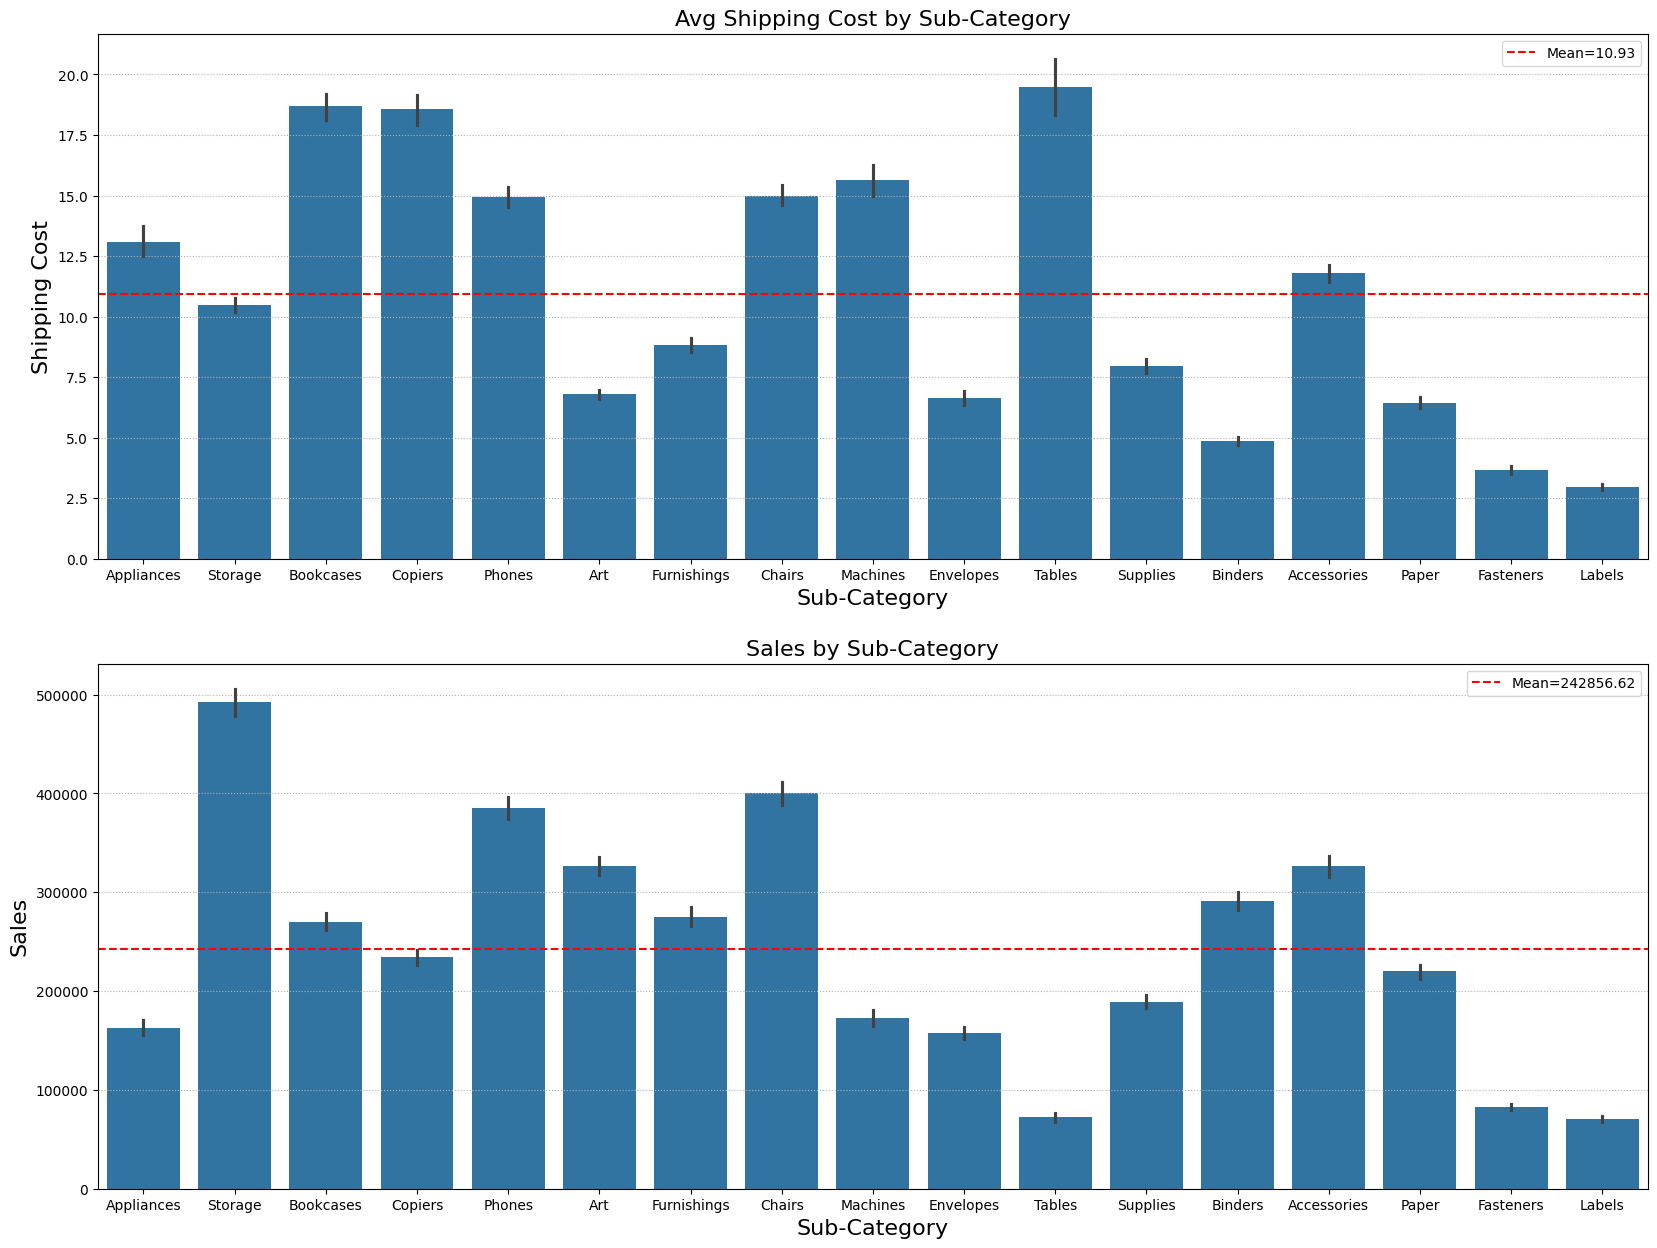

In [34]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.barplot(x='Sub-Category', y='Shipping Cost',  data=file,estimator='mean')
plt.axhline(avg_ship, color='red', linestyle='--',label=f"Mean={np.round((avg_ship),2)}")
plt.title('Avg Shipping Cost by Sub-Category',fontsize = 16)
plt.xlabel('Sub-Category',fontsize = 16)
plt.ylabel('Shipping Cost',fontsize = 16)
plt.legend()
plt.grid(axis='y',linestyle=':')

plt.subplot(2,1,2)
sns.barplot(x='Sub-Category', y='Sales',  data=file,estimator='sum')
plt.axhline(avg_sales, color='red', linestyle='--',label=f"Mean={np.round((avg_sales),2)}")
plt.title('Sales by Sub-Category',fontsize = 16)
plt.xlabel('Sub-Category',fontsize = 16)
plt.ylabel('Sales',fontsize = 16)
plt.legend()
plt.grid(axis='y',linestyle=':')

plt.show()



- These were the produts having high shipping cost but low sales

|Sub-Category |Shipping Cost | Sales |
|---|---|---|
|Tables	    |19.474060	|72180.34|
|Copiers	|18.557261	|234342.78|
|Machines	|15.642059	|173114.51|
|Appliances	|13.096546	|162740.87|



In [35]:
#5. Which sub-categories have low quantity sold but high revenue genrated?
sub_cat_sale_quantity = file.groupby('Sub-Category').agg({'Sales':'sum','Quantity':'mean'}).sort_values(by='Sales')

avg_Sales = sub_cat_sale_quantity['Sales'].mean().round(2)
avg_Quantity = sub_cat_sale_quantity['Quantity'].mean().round(2)

sub_cat_Hsale_Lquantity = (sub_cat_sale_quantity[(sub_cat_sale_quantity['Sales'] > avg_Sales) 
    & (sub_cat_sale_quantity['Quantity'] < avg_Quantity)])

print(f"""
Avg. Quantity = {avg_Quantity}
Avg. Sales = {avg_Sales}
Lets consider more than average is high and less than average is low
""")
sub_cat_Hsale_Lquantity


Avg. Quantity = 3.01
Avg. Sales = 242856.62
Lets consider more than average is high and less than average is low



,Sales,Quantity
Sub-Category,,
Bookcases,270191.10,2.343863
Phones,384896.05,2.803519
Chairs,400110.19,2.880000
Storage,492509.26,2.947741


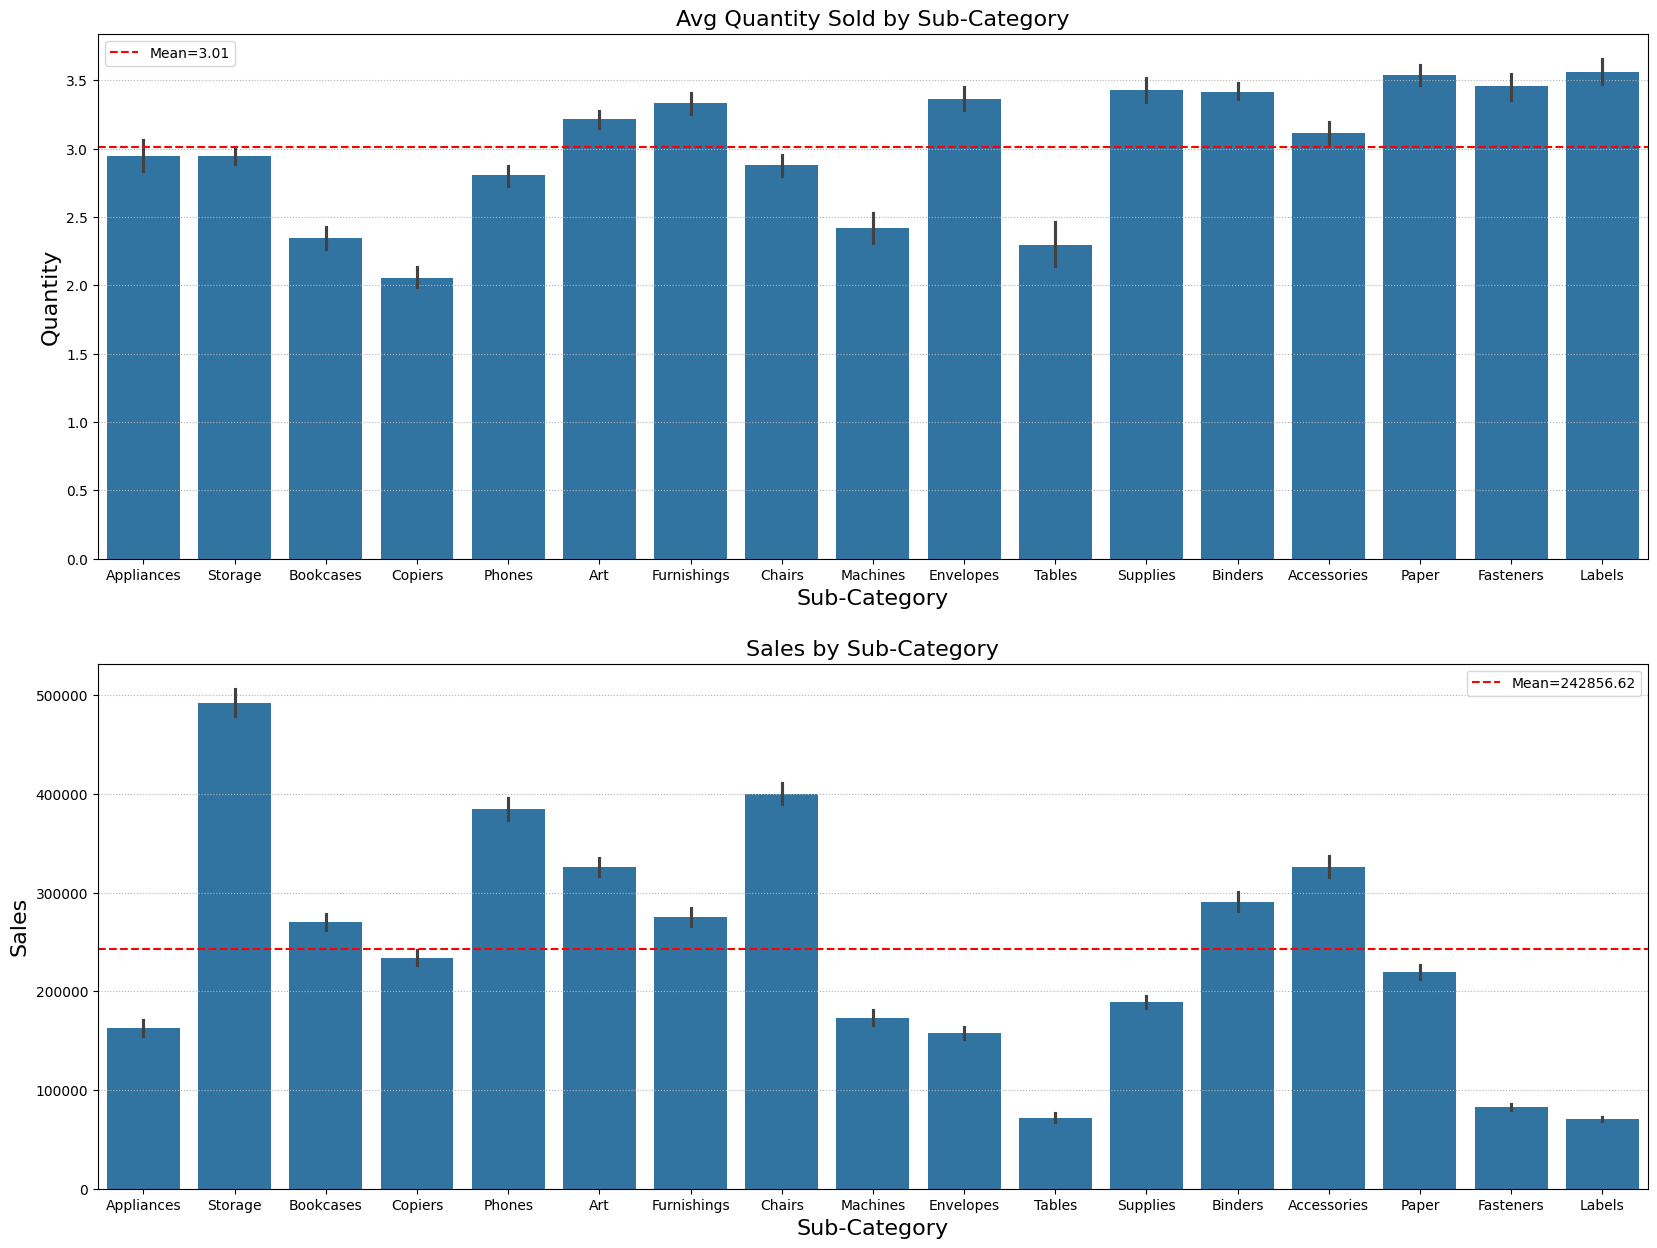

In [36]:
plt.figure(figsize=(20,15))
plt.subplot(2,1,1)
sns.barplot(x='Sub-Category', y='Quantity',  data=file,estimator='mean')
plt.axhline(avg_Quantity, color='red', linestyle='--',label=f"Mean={np.round((avg_Quantity),2)}")
plt.title('Avg Quantity Sold by Sub-Category',fontsize = 16)
plt.xlabel('Sub-Category',fontsize = 16)
plt.ylabel('Quantity',fontsize = 16)
plt.legend()
plt.grid(axis='y',linestyle=':')

plt.subplot(2,1,2)
sns.barplot(x='Sub-Category', y='Sales',  data=file,estimator='sum')
plt.axhline(avg_Sales, color='red', linestyle='--',label=f"Mean={np.round((avg_Sales),2)}")
plt.title('Sales by Sub-Category',fontsize = 16)
plt.xlabel('Sub-Category',fontsize = 16)
plt.ylabel('Sales',fontsize = 16)
plt.legend()
plt.grid(axis='y',linestyle=':')

plt.show()



- These were the produts having low quantity sold but high revenue genrated
  
|Sub-Category |Sales |Quantity|
|---|---|---|
|Bookcases	|270191.10	|2.34|
|Phones	|384896.05	|2.80|
|Chairs	|400110.19	|2.88|
|Storage	|492509.26	|2.94|


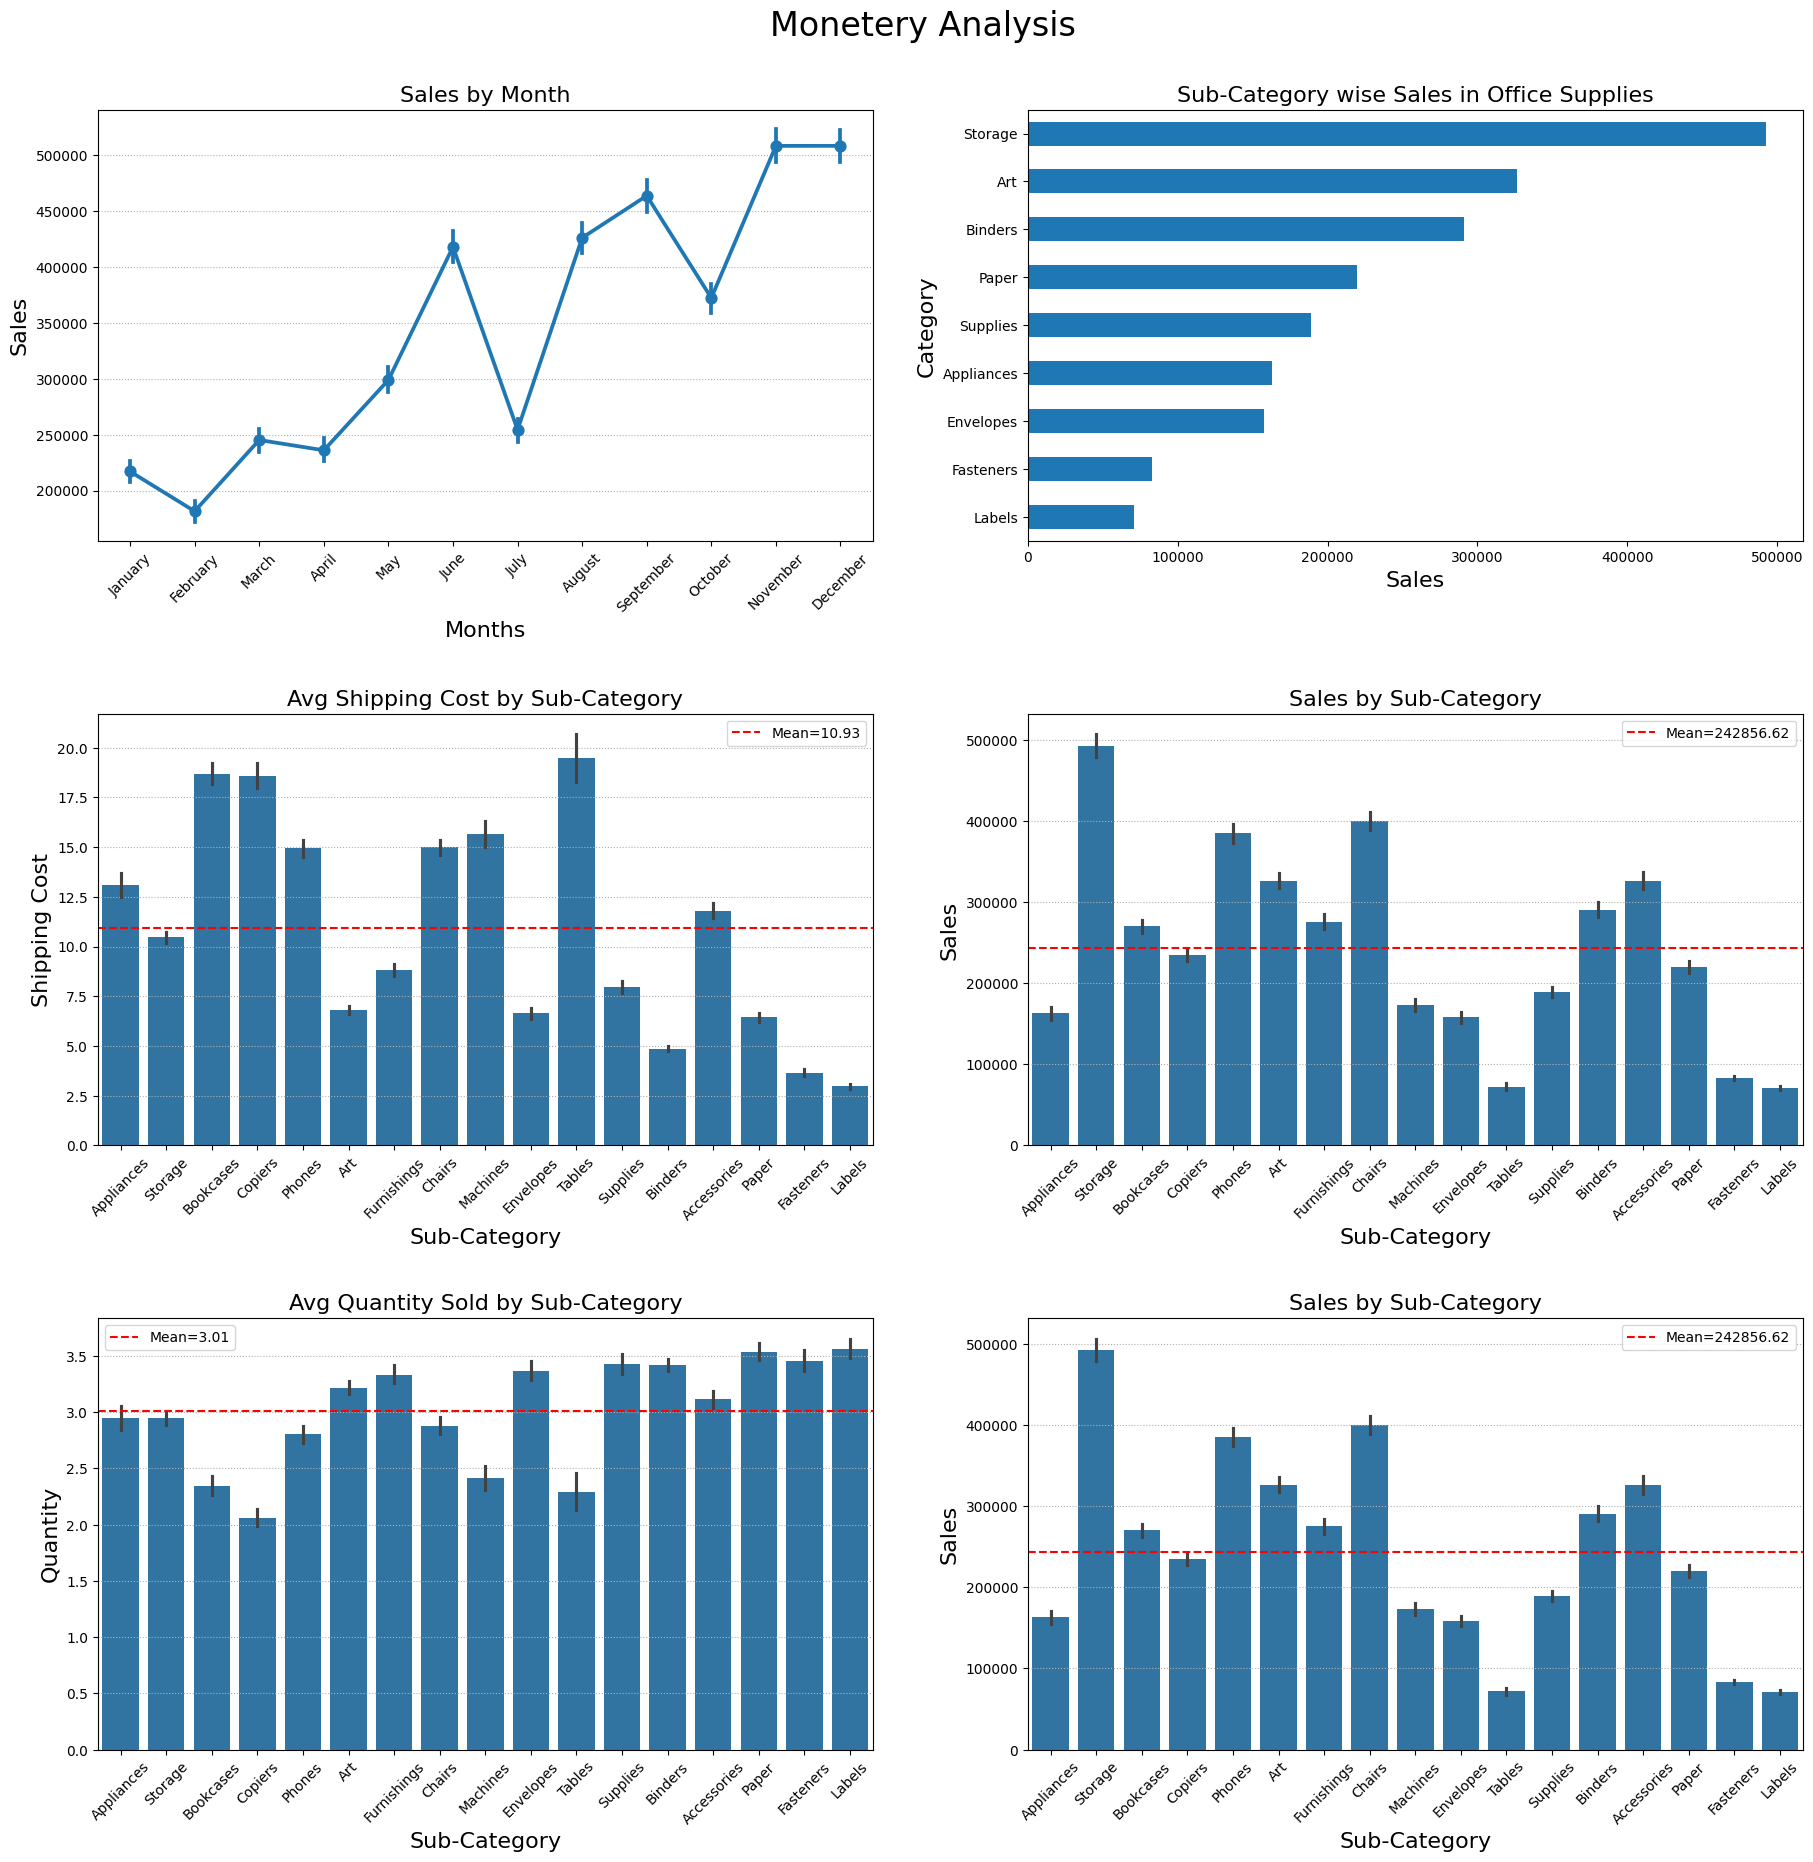

In [78]:
plt.figure(figsize=(22,20))
plt.suptitle("Monetery Analysis",fontsize = 24) 
plt.tight_layout() 



plt.subplot(3,2,1)

sns.pointplot(x='Order_Month', y='Sales',  data=file,estimator='sum')
plt.title('Sales by Month',fontsize = 16)
plt.xlabel('Months',fontsize = 16)
plt.xticks(rotation=45)
plt.ylabel('Sales',fontsize = 16)
plt.grid(axis='y',linestyle=':')



plt.subplot(3,2,2)

t_sales_sub_cat.plot(kind='barh')
plt.title('Sub-Category wise Sales in Office Supplies',fontsize = 16)
plt.ylabel('Category',fontsize = 16)
plt.xlabel('Sales',fontsize = 16)



plt.subplot(3,2,3)

sns.barplot(x='Sub-Category', y='Shipping Cost',  data=file,estimator='mean')
plt.axhline(avg_ship, color='red', linestyle='--',label=f"Mean={np.round((avg_ship),2)}")
plt.title('Avg Shipping Cost by Sub-Category',fontsize = 16)
plt.xlabel('Sub-Category',fontsize = 16)
plt.xticks(rotation=45)
plt.ylabel('Shipping Cost',fontsize = 16)
plt.legend()
plt.grid(axis='y',linestyle=':')



plt.subplot(3,2,4)

sns.barplot(x='Sub-Category', y='Sales',  data=file,estimator='sum')
plt.axhline(avg_sales, color='red', linestyle='--',label=f"Mean={np.round((avg_sales),2)}")
plt.title('Sales by Sub-Category',fontsize = 16)
plt.xlabel('Sub-Category',fontsize = 16)
plt.xticks(rotation=45)
plt.ylabel('Sales',fontsize = 16)
plt.legend()
plt.grid(axis='y',linestyle=':')



plt.subplot(3,2,5)

sns.barplot(x='Sub-Category', y='Quantity',  data=file,estimator='mean')
plt.axhline(avg_Quantity, color='red', linestyle='--',label=f"Mean={np.round((avg_Quantity),2)}")
plt.title('Avg Quantity Sold by Sub-Category',fontsize = 16)
plt.xlabel('Sub-Category',fontsize = 16)
plt.xticks(rotation=45)
plt.ylabel('Quantity',fontsize = 16)
plt.legend()
plt.grid(axis='y',linestyle=':')


    
plt.subplot(3,2,6)

sns.barplot(x='Sub-Category', y='Sales',  data=file,estimator='sum')
plt.axhline(avg_Sales, color='red', linestyle='--',label=f"Mean={np.round((avg_Sales),2)}")
plt.title('Sales by Sub-Category',fontsize = 16)
plt.xlabel('Sub-Category',fontsize = 16)
plt.xticks(rotation=45)
plt.ylabel('Sales',fontsize = 16)
plt.legend()
plt.grid(axis='y',linestyle=':')


plt.subplots_adjust(hspace=0.4,top=0.93)
plt.show()

## 🌍 Market Analysis
Features used: `Market`, `Segment`, `Sales`, `Profit`, `Order Priority`

1. Which market has the highest total sales?
2. Which sub-category was standing high in highest total sales market?
3. Which customer segment dominates each market?
4. How does order priority vary across different markets?
5. Which months have the highest number of orders?

In [37]:
#1. Which market has the highest total sales?
high_market = file.groupby("Market")['Sales'].sum().sort_values(ascending=False)
high_market

Market
APAC      971662.39
EU        924911.76
LATAM     848998.17
US        678280.96
EMEA      349721.80
Africa    325225.17
Canada     29762.34
Name: Sales, dtype: float64

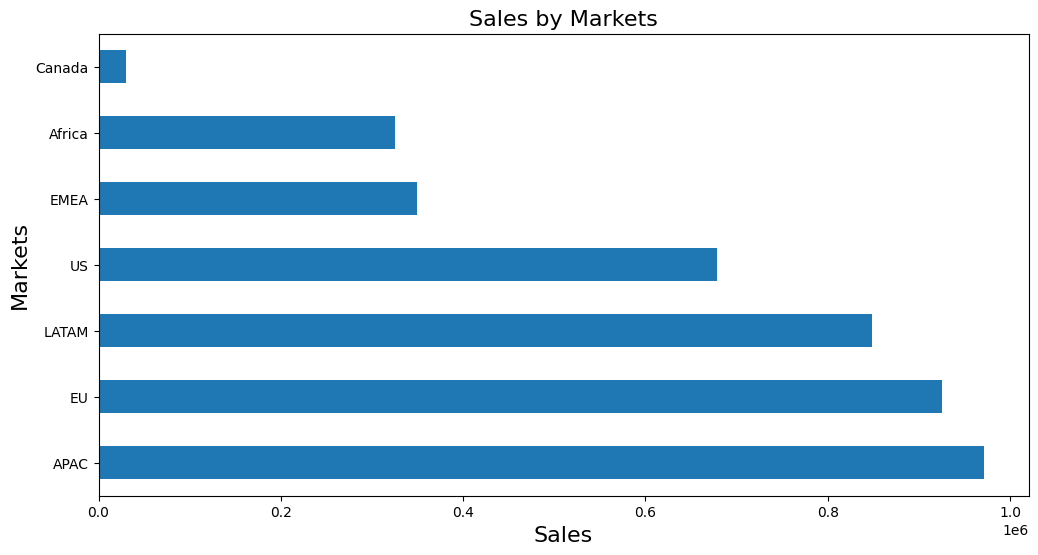

In [38]:
plt.figure(figsize=(12, 6))
high_market.plot(kind='barh')
plt.title('Sales by Markets',fontsize = 16)
plt.ylabel('Markets',fontsize = 16)
plt.xlabel('Sales',fontsize = 16)
plt.show()


|Rank |Market |Sales|
|---|---|---|
|1 |APAC(Asia PACific)      |971662.39|
|2 |EU(Europe Union)        |924911.76|
|3 |LATAM(LATin AMerica)     |848998.17|
|4 |US(United States)        |678280.96|
|5 |EMEA(Europe, Middle East, Africa)      |349721.80|
|6 |Africa    |325225.17|
|7 |Canada     |29762.34|

- APAC market is in the top in Sales.
- Canada and Africa markets were last in the sales table with comparitively low sales.
- EU, LATAM, US were stands in the middle position in the ranking table.


In [39]:
#2. Which sub-category was standing high in top market?
#We already knew that 'APAC' is the top mraket on Sales
sub_cat_top_mar = file[file['Market'] == 'APAC'].groupby('Sub-Category')['Sales'].sum().sort_values(ascending = False)
sub_cat_top_mar

Sub-Category
Chairs         114727.08
Accessories     83772.31
Phones          82017.41
Storage         80238.21
Furnishings     74730.89
Supplies        65505.56
Bookcases       59545.91
Art             58826.36
Copiers         58792.76
Binders         58532.37
Paper           54628.99
Envelopes       48672.24
Machines        41427.20
Appliances      29515.12
Fasteners       27851.17
Labels          22323.21
Tables          10555.60
Name: Sales, dtype: float64

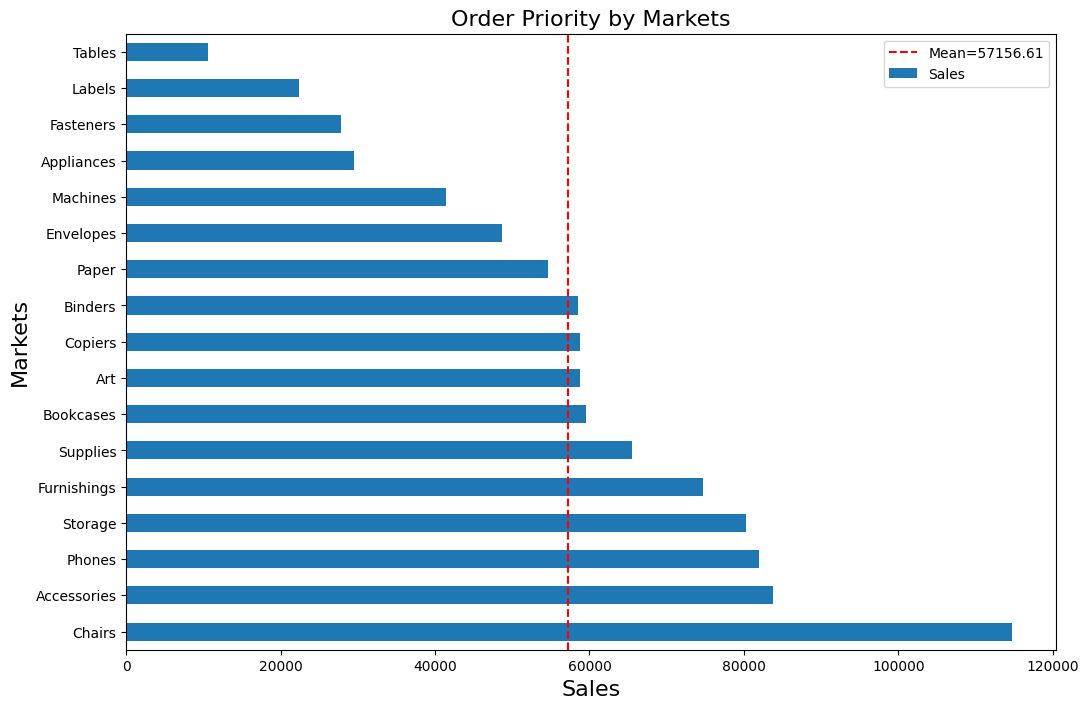

In [40]:
plt.figure(figsize=(12, 8))
sub_cat_top_mar.plot(kind='barh')
plt.title('Order Priority by Markets',fontsize = 16)
plt.ylabel('Markets',fontsize = 16)
plt.xlabel('Sales',fontsize = 16)
plt.axvline(sub_cat_top_mar.values.mean(),color='red', linestyle='--',label=f"Mean={np.round((sub_cat_top_mar.values.mean()),2)}")
plt.legend()
plt.show()

- Chairs were made the high sales in the APAC market than others.
- Labels weer sold least in this list.
- Chairs made 11 times more slaes than the lables.

In [41]:
#3. Which customer segment dominates each market?
seg_mar = file.groupby(['Market','Segment'])['Sales'].sum().reset_index()
sort_seg_mar = seg_mar.sort_values(by=['Market','Sales'],ascending=[True,False])
top_sort_seg_mar = sort_seg_mar.groupby("Market").nth(0)
top_sort_seg_mar

,Market,Segment,Sales
0,APAC,Consumer,509295.40
3,Africa,Consumer,168016.65
6,Canada,Consumer,14636.76
9,EMEA,Consumer,175956.59
12,EU,Consumer,474243.47
15,LATAM,Consumer,436110.36
18,US,Consumer,362421.65


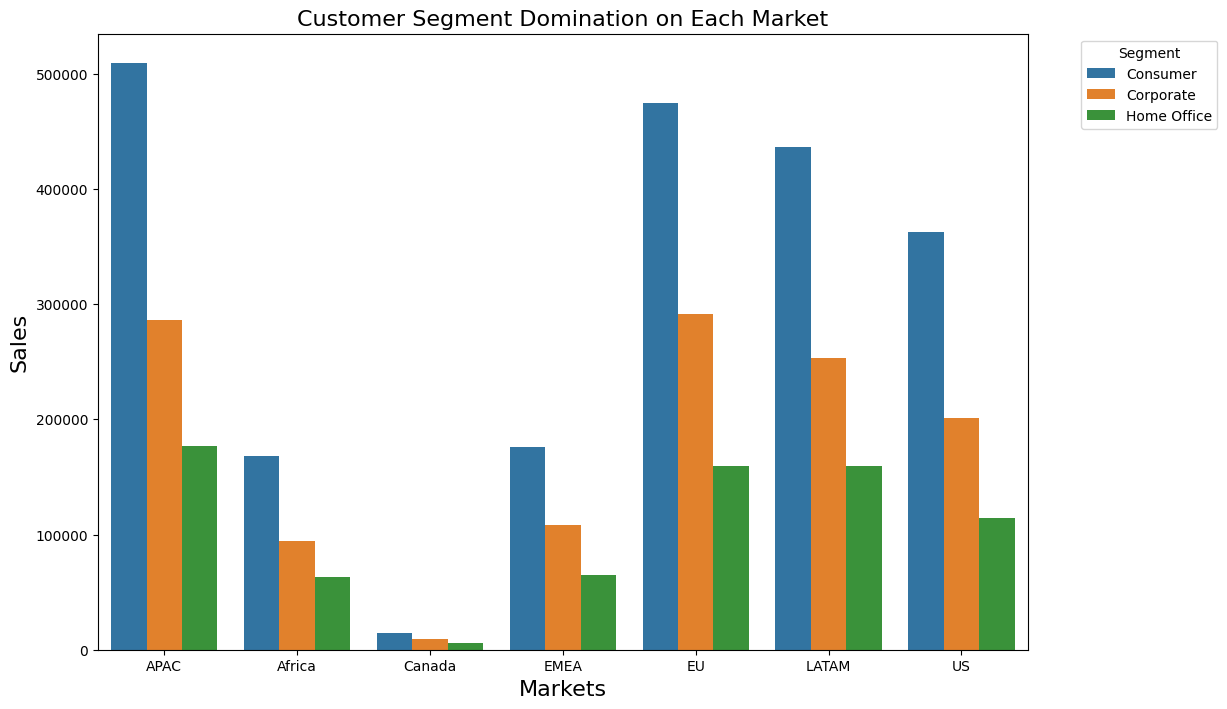

In [42]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Market', y='Sales', hue='Segment', data=sort_seg_mar)
plt.title('Customer Segment Domination on Each Market',fontsize = 16)
plt.xlabel('Markets',fontsize = 16)
plt.ylabel('Sales',fontsize = 16)
plt.legend(title='Segment', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

- Here we can clearly see that 'Comsumer' segment is the most dominated segment in all the markets.
- Especially in the Asia Pacific(APAC) market, Consumer segment goods made a sales for 509295.
- Corporate segment goods got the second place in domination all the markets followed by Home Office Segment.

In [43]:
#4. How does order priority vary across different markets?
order_priority_market = file.groupby(['Market','Order Priority'])['Sales'].sum().reset_index()
sort_order_priority_market = order_priority_market.sort_values(by=['Market','Sales'],ascending = [True,False])
top_sort_order_priority_market = sort_order_priority_market.groupby('Market').nth(0)
top_sort_order_priority_market

,Market,Order Priority,Sales
3,APAC,Medium,666820.26
7,Africa,Medium,214304.28
11,Canada,Medium,20234.07
15,EMEA,Medium,229389.49
19,EU,Medium,628489.00
23,LATAM,Medium,566173.18
27,US,Medium,459566.86


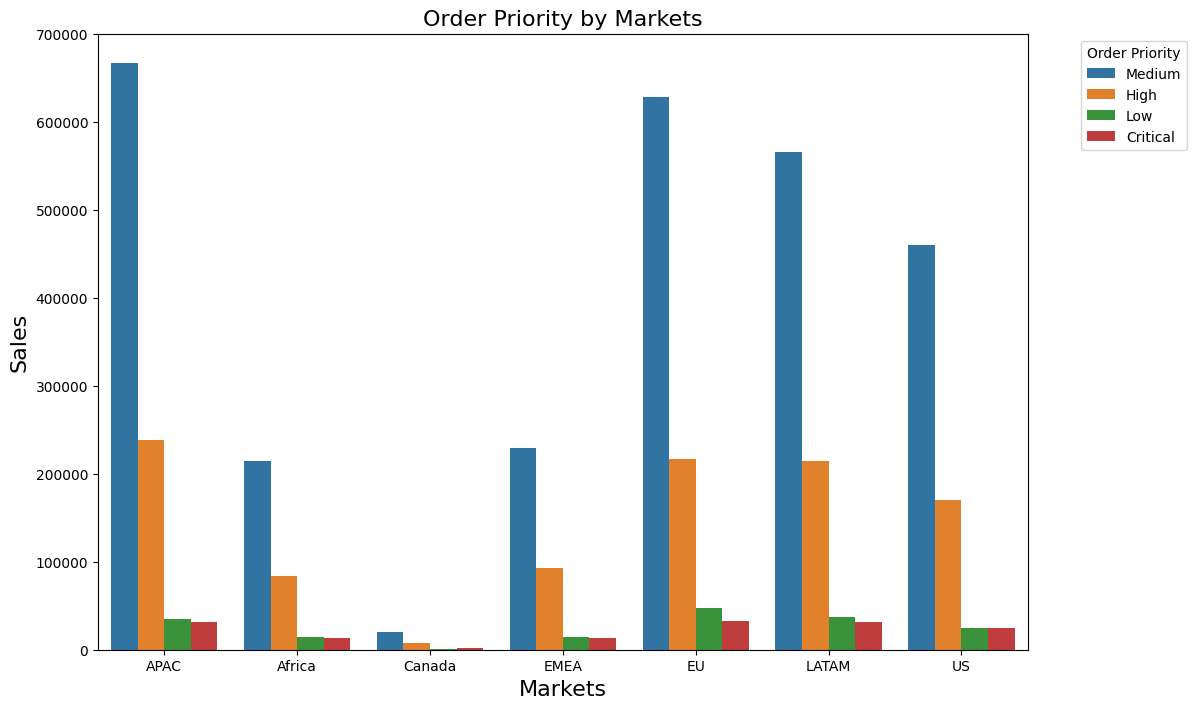

In [44]:
plt.figure(figsize=(12, 8))
sns.barplot(x='Market', y='Sales', hue='Order Priority', data=sort_order_priority_market)
plt.title('Order Priority by Markets',fontsize = 16)
plt.xlabel('Markets',fontsize = 16)
plt.ylabel('Sales',fontsize = 16)
plt.legend(title='Order Priority', bbox_to_anchor=(1.05, 1), loc=2)
plt.show()

- Here we can clearly see that Order Priority level of 'Medium' is the most prefered level in all the markets.

In [45]:
#5. Which months have the highest number of orders?
#all years
month_high_orders = file.groupby("Order_Month")['Order ID'].count()
month_high_orders.sort_values(ascending=False)

#2011
month_high_orders2011 = file[file["Order_Year"] == 2011].groupby("Order_Month")['Order ID'].count()
month_high_orders2011.sort_values(ascending=False)

#2012
month_high_orders2012 = file[file["Order_Year"] == 2012].groupby("Order_Month")['Order ID'].count()
month_high_orders2012.sort_values(ascending=False)

#2013
month_high_orders2013 = file[file["Order_Year"] == 2013].groupby("Order_Month")['Order ID'].count()
month_high_orders2013.sort_values(ascending=False)

#2014
month_high_orders2014 = file[file["Order_Year"] == 2014].groupby("Order_Month")['Order ID'].count()
month_high_orders2014.sort_values(ascending=False)

Order_Month
December     1787
November     1724
September    1652
June         1442
August       1337
October      1313
May          1072
July          891
March         884
April         857
January       751
February      615
Name: Order ID, dtype: int64

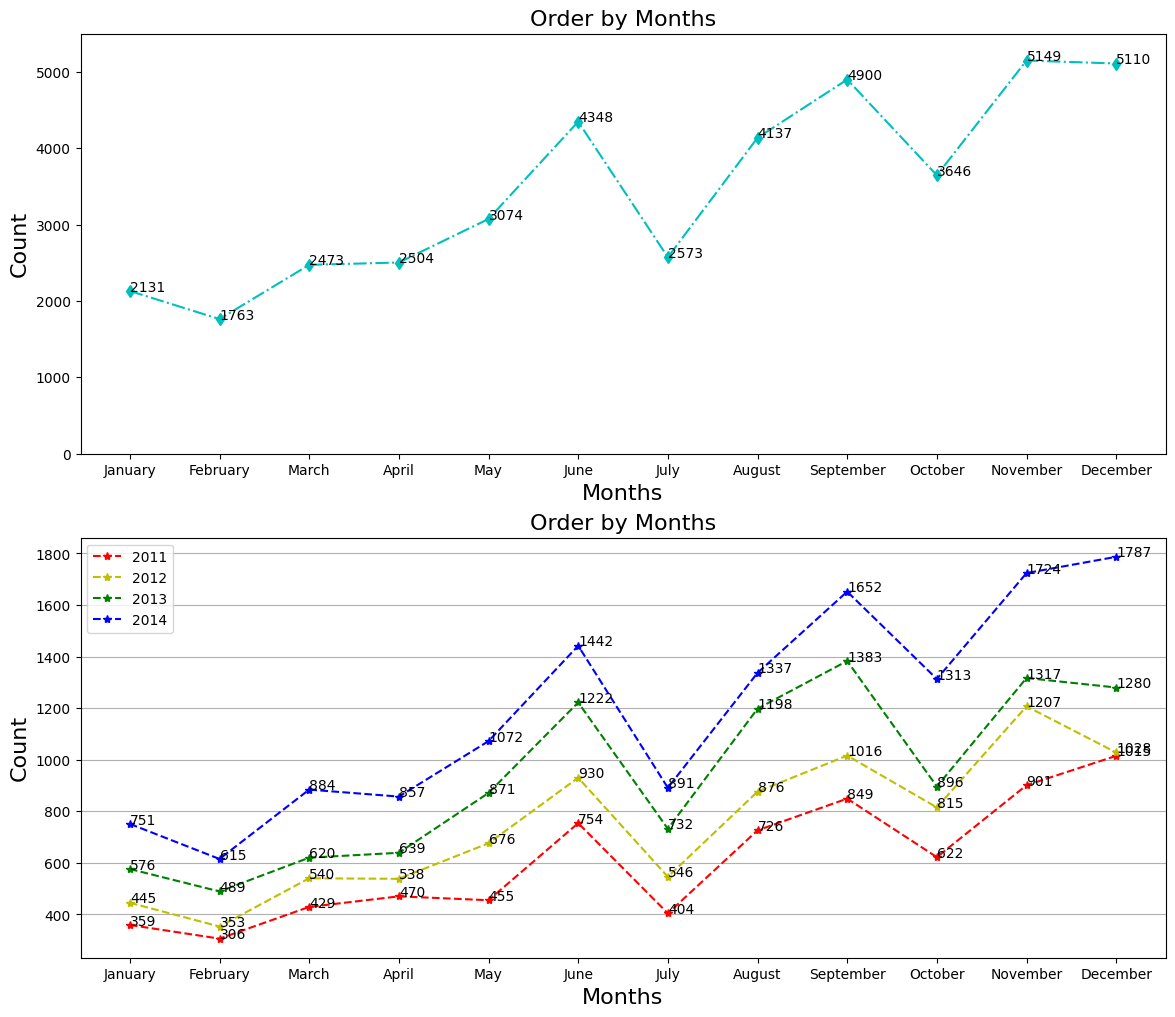

In [46]:
plt.figure(figsize=(14,12))
plt.subplot(2,1,1)
plt.plot(month_high_orders.index,month_high_orders.values,'dc-.')
plt.title("Order by Months",fontsize = 16)
plt.xlabel('Months',fontsize = 16)
plt.ylabel('Count',fontsize = 16)
plt.ylim(0,5500)
for x,y in zip(month_high_orders.index,month_high_orders.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))


plt.subplot(2,1,2)
plt.plot(month_high_orders2011.index,month_high_orders2011.values,'*r--',label='2011')
plt.plot(month_high_orders2012.index,month_high_orders2012.values,'*y--',label='2012')
plt.plot(month_high_orders2013.index,month_high_orders2013.values,'*g--',label='2013')
plt.plot(month_high_orders2014.index,month_high_orders2014.values,'*b--',label='2014')
plt.title("Order by Months",fontsize = 16)
plt.xlabel('Months',fontsize = 16)
plt.ylabel('Count',fontsize = 16)
plt.grid(axis='y')
for x,y in zip(month_high_orders2011.index,month_high_orders2011.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))
for x,y in zip(month_high_orders2012.index,month_high_orders2012.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))
for x,y in zip(month_high_orders2013.index,month_high_orders2013.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))
for x,y in zip(month_high_orders2014.index,month_high_orders2014.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))
plt.legend()
plt.show()

- November month received the highest sales over years.
- In 2011, December with most sales.
- In 2012, November with most sales.
- In 2013, September with most sales.
- In 2014, December with most sales.

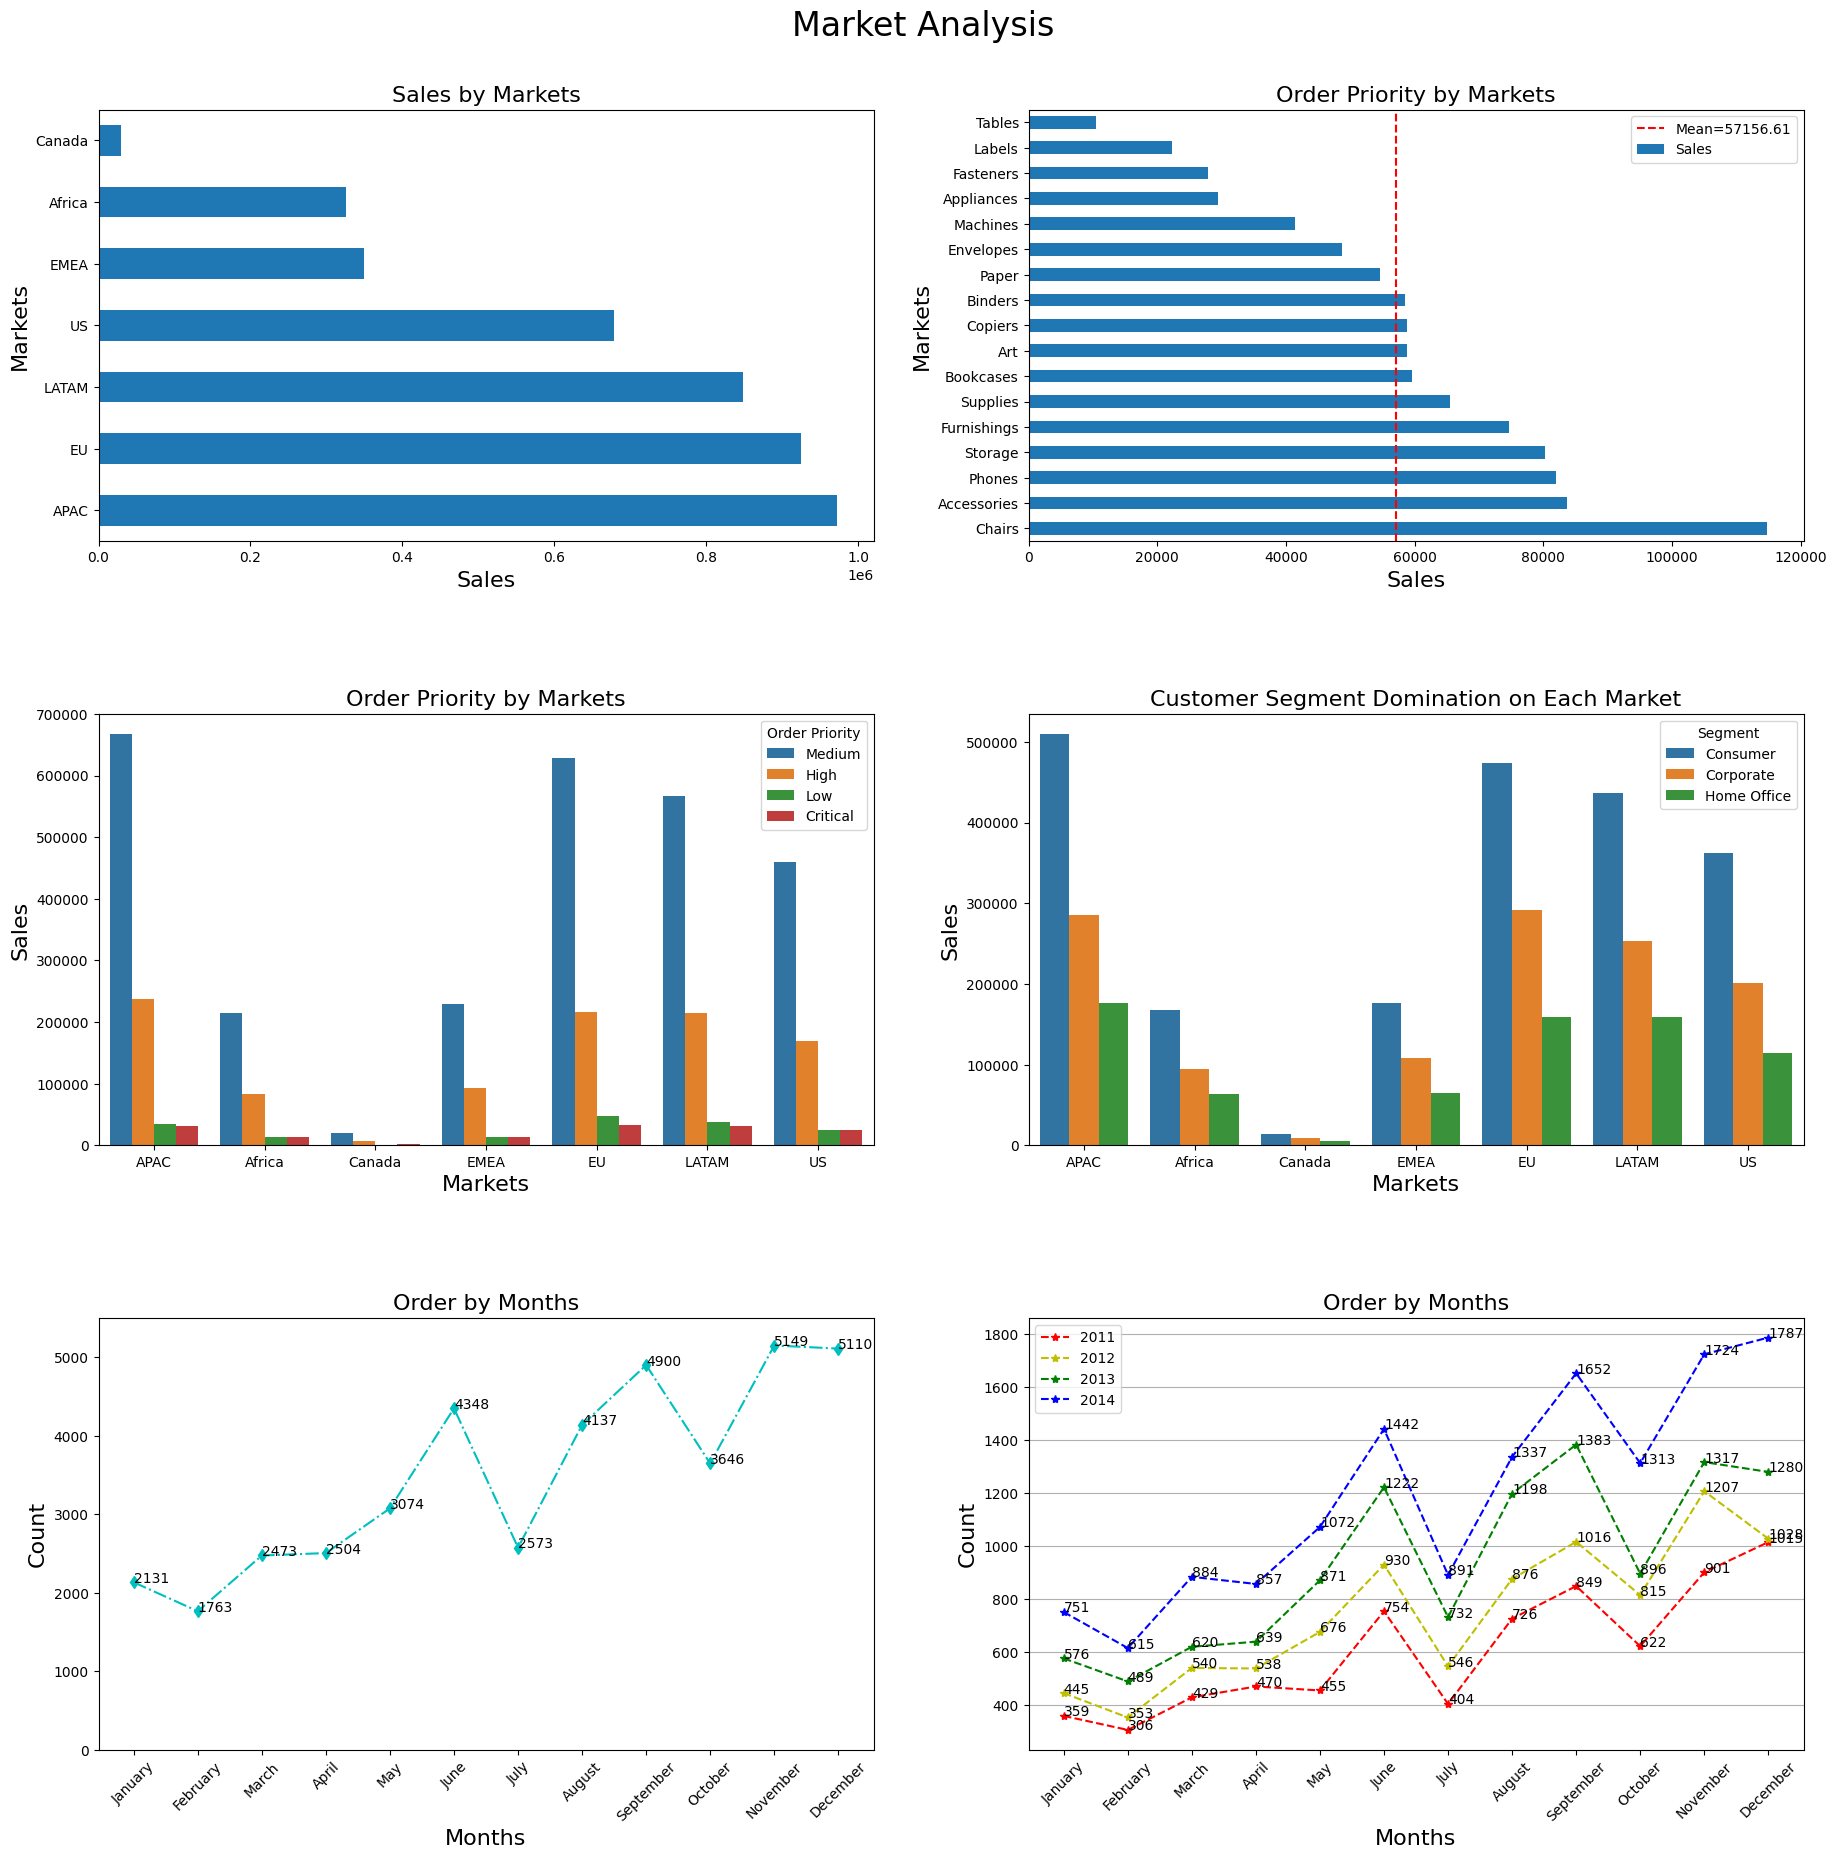

In [80]:
plt.figure(figsize=(22,20))
plt.tight_layout(rect=[0, 0.03, 1, 0.95]) 
plt.suptitle("Market Analysis",fontsize = 24)


plt.subplot(3,2,1)

high_market.plot(kind='barh')
plt.title('Sales by Markets',fontsize = 16)
plt.ylabel('Markets',fontsize = 16)
plt.xlabel('Sales',fontsize = 16)



plt.subplot(3,2,2)

sub_cat_top_mar.plot(kind='barh')
plt.title('Order Priority by Markets',fontsize = 16)
plt.ylabel('Markets',fontsize = 16)
plt.xlabel('Sales',fontsize = 16)
plt.axvline(sub_cat_top_mar.values.mean(),color='red', linestyle='--',label=f"Mean={np.round((sub_cat_top_mar.values.mean()),2)}")
plt.legend()



plt.subplot(3,2,3)

sns.barplot(x='Market', y='Sales', hue='Order Priority', data=sort_order_priority_market)
plt.title('Order Priority by Markets',fontsize = 16)
plt.xlabel('Markets',fontsize = 16)
plt.ylabel('Sales',fontsize = 16)



plt.subplot(3,2,4)

sns.barplot(x='Market', y='Sales', hue='Segment', data=sort_seg_mar)
plt.title('Customer Segment Domination on Each Market',fontsize = 16)
plt.xlabel('Markets',fontsize = 16)
plt.ylabel('Sales',fontsize = 16)



plt.subplot(3,2,5)

plt.plot(month_high_orders.index,month_high_orders.values,'dc-.')
plt.title("Order by Months",fontsize = 16)
plt.xlabel('Months',fontsize = 16)
plt.xticks(rotation=45)
plt.ylabel('Count',fontsize = 16)
plt.ylim(0,5500)
for x,y in zip(month_high_orders.index,month_high_orders.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))


    
plt.subplot(3,2,6)

plt.plot(month_high_orders2011.index,month_high_orders2011.values,'*r--',label='2011')
plt.plot(month_high_orders2012.index,month_high_orders2012.values,'*y--',label='2012')
plt.plot(month_high_orders2013.index,month_high_orders2013.values,'*g--',label='2013')
plt.plot(month_high_orders2014.index,month_high_orders2014.values,'*b--',label='2014')
plt.title("Order by Months",fontsize = 16)
plt.xlabel('Months',fontsize = 16)
plt.xticks(rotation=45)
plt.ylabel('Count',fontsize = 16)
plt.grid(axis='y')
for x,y in zip(month_high_orders2011.index,month_high_orders2011.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))
for x,y in zip(month_high_orders2012.index,month_high_orders2012.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))
for x,y in zip(month_high_orders2013.index,month_high_orders2013.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))
for x,y in zip(month_high_orders2014.index,month_high_orders2014.values):
    plt.annotate(y,xy=(x,y),xytext=(x,y))
plt.legend()


plt.subplots_adjust(hspace=0.4,top=0.93)
plt.show()